# DAV 5400 Project 3 (Module 11)
## *Data Aggregation, Grouping, Reshaping & Analysis*

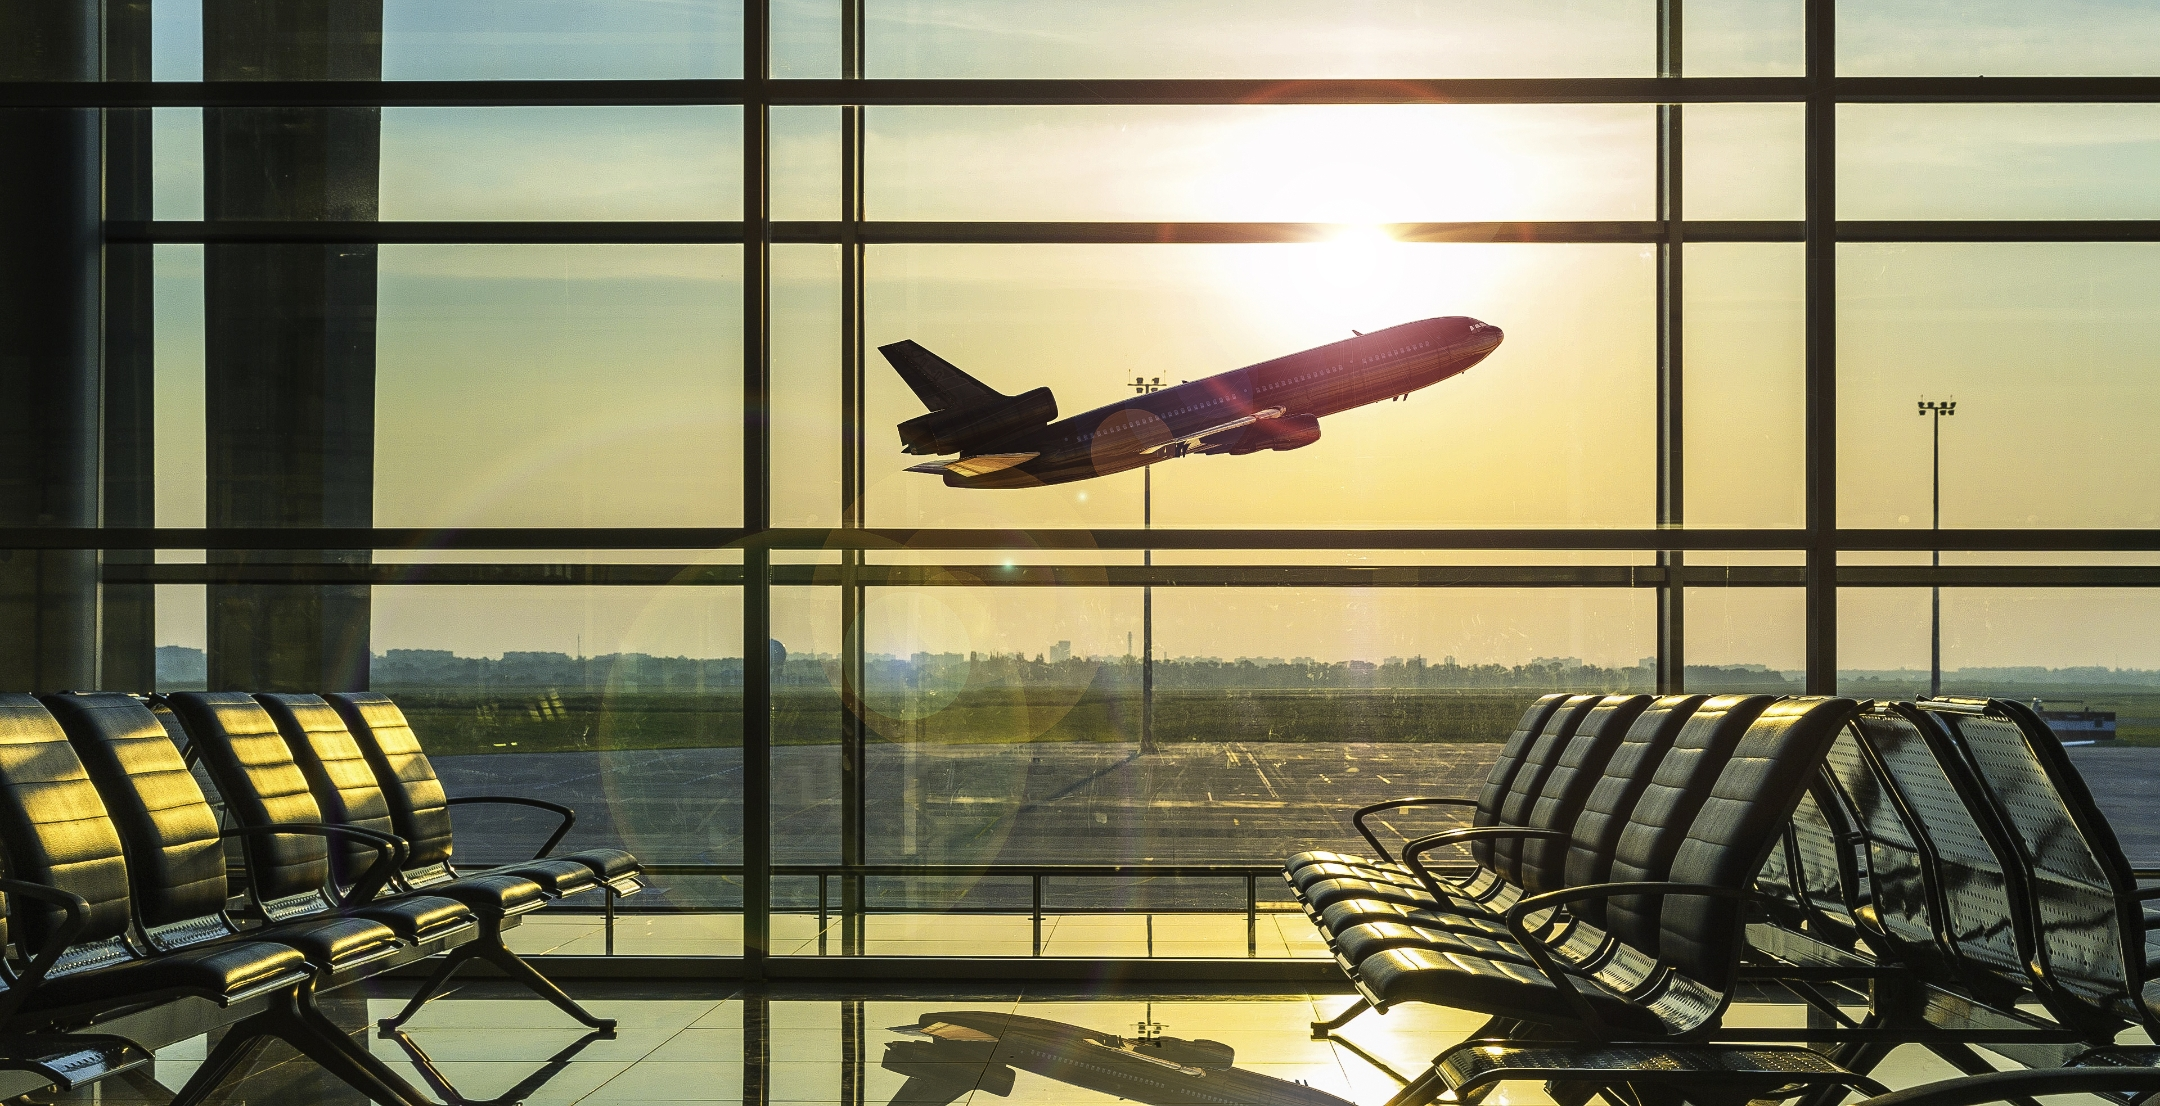

## **1. Introduction**:

In the airline industry, understanding passenger behavior and preferences is crucial and one of the most important thing for ensuring customer satisfaction and fostering their loyalty. To glean insights into these aspects, we are utilizing this dataset. The dataset comprises responses to surveys related to in-flight behavior and perceptions of rudeness, and it also provides demographic information about the respondents. <br>
Our objective is to conduct a comprehensive analysis of these datasets to uncover patterns and correlations between various demographic variables—such as travel frequency, presence of children under 18, gender, age, household income, and education level—and passenger attitudes towards different in-flight experiences.<br>
By examining these relationships, airlines can gain valuable insights that helps them to take up the strategic decisions which are mainly aimed at enhancing the overall flying experience.<br>
These kinds of insights are mostly valuable to stakeholders within major airlines, offering them actionable information to tailor their services, improve customer satisfaction, and ultimately drive the success of their operations.

## **2. Data Loading + Manipulation**

### Step 1: Import Python Libraries

- Import all libraries which are required for our analysis, such as
  a.Data Loading
  b.Statistical analysis
  c.Visualizations
  d.Data Transformations, Merge and Joins, etc.

- __Pandas__ and __Numpy__ have been used for __Data Manipulation__ and __numerical Calculations__.

- __Matplotlib__ and __Seaborn__ have been used for __Data visualizations__.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Step 2: Reading Dataset
- Here, using the __read_csv()__ function, I am converting the data into the pandas dataframe.
- The data is stored in the DataFrame __data__.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/flying-etiquette-survey/flying-etiquette.csv")
data

RespondentID How often do you travel by plane?  \
0       3436139758               Once a year or less   
1       3434278696               Once a year or less   
2       3434275578               Once a year or less   
3       3434268208               Once a year or less   
4       3434250245              Once a month or less   
...            ...                               ...   
1035    3431732652               Once a year or less   
1036    3431731770                             Never   
1037    3431731485                             Never   
1038    3431731196                             Never   
1039    3431729581               Once a year or less   

     Do you ever recline your seat when you fly? How tall are you?  \
0                                            NaN               NaN   
1                            About half the time              6'3"   
2                                        Usually              5'8"   
3                                         Always             5'11"   
4                            About half the time              5'7"   
...                                          ...               ...   
1035                             Once in a while              5'7"   
1036                                         NaN               NaN   
1037                                         NaN               NaN   
1038                                         NaN               NaN   
1039                             Once in a while              6'3"   

     Do you have any children under 18?  \
0                                   NaN   
1                                   Yes   
2                                    No   
3                                    No   
4                                    No   
...                                 ...   
1035                                 No   
1036                                NaN   
1037                                NaN   
1038                                NaN   
1039                                 No   

     In a row of three seats, who should get to use the two arm rests?  \
0                                                   NaN                  
1                        The arm rests should be shared                  
2          Whoever puts their arm on the arm rest first                  
3                        The arm rests should be shared                  
4     The person in the middle seat gets both arm rests                  
...                                                 ...                  
1035                             Other (please specify)                  
1036                                                NaN                  
1037                                                NaN                  
1038                                                NaN                  
1039                     The arm rests should be shared                  

     In a row of two seats, who should get to use the middle arm rest?  \
0                                                   NaN                  
1                        The arm rests should be shared                  
2                        The arm rests should be shared                  
3                        The arm rests should be shared                  
4                                   The person in aisle                  
...                                                 ...                  
1035                             Other (please specify)                  
1036                                                NaN                  
1037                                                NaN                  
1038                                                NaN                  
1039                     The arm rests should be shared                  

         Who should have control over the window shade?  \
0                                                   NaN   
1              Everyone in the row should have some say   
2     The person in 

In [3]:
data.columns

Index(['RespondentID', 'How often do you travel by plane?',
       'Do you ever recline your seat when you fly?', 'How tall are you?',
       'Do you have any children under 18?',
       'In a row of three seats, who should get to use the two arm rests?',
       'In a row of two seats, who should get to use the middle arm rest?',
       'Who should have control over the window shade?',
       'Is itrude to move to an unsold seat on a plane?',
       'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?',
       'On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?',
       'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?',
       'Is itrude to recline your seat on a plane?',
       'Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?',
       'I

### Step 3: Creating a new dataframe comprised of only the demographic data
- There are 27 columns in our original dataset in those only the eight columns according to me are demographic data.
- Demographic data columns are :__RespondentID__,__How tall are you?__,__Do you have any children under 18?__,__Gender__, __Age__, __Household Income__, __Education__,__Location (Census Region)__.
- __demo_data__ is the new data set in which all the demographical data is stored.

In [4]:
demo_data=data[['RespondentID','How tall are you?','Do you have any children under 18?','Gender', 'Age', 'Household Income',
                'Education','Location (Census Region)']]
demo_data

RespondentID How tall are you? Do you have any children under 18?  \
0       3436139758               NaN                                NaN   
1       3434278696              6'3"                                Yes   
2       3434275578              5'8"                                 No   
3       3434268208             5'11"                                 No   
4       3434250245              5'7"                                 No   
...            ...               ...                                ...   
1035    3431732652              5'7"                                 No   
1036    3431731770               NaN                                NaN   
1037    3431731485               NaN                                NaN   
1038    3431731196               NaN                                NaN   
1039    3431729581              6'3"                                 No   

      Gender    Age     Household Income                         Education  \
0        NaN    NaN                  NaN                               NaN   
1       Male  30-44                  NaN                   Graduate degree   
2       Male  30-44  $100,000 - $149,999                   Bachelor degree   
3       Male  30-44         $0 - $24,999                   Bachelor degree   
4       Male  30-44    $50,000 - $99,999                   Bachelor degree   
...      ...    ...                  ...                               ...   
1035    Male  30-44         $0 - $24,999  Some college or Associate degree   
1036    Male  45-60               150000                   Bachelor degree   
1037  Female   > 60                  NaN  Some college or Associate degree   
1038  Female  30-44    $50,000 - $99,999                   Bachelor degree   
1039    Male   > 60    $50,000 - $99,999                   Bachelor degree   

     Location (Census Region)  
0                         NaN  
1                     Pacific  
2                     Pacific  
3                     Pacific  
4                     Pacific  
...                       ...  
1035       East North Central  
1036                  Pacific  
1037       East North Central  
1038              New England  
1039                  Pacific  

[1040 rows x 8 columns]

### Step 4: Applying appropriate column headings to the columns

- __rename()__ is used to change the column heading of the columns __'How tall are you?'__ and __'Do you have any children under 18?'__ as __'Height'__ and __'Has_Children_Under18'__ respectively.

In [5]:
# rename the columns
demo_data.rename( columns={'How tall are you?':'Height','Do you have any children under 18?':'Has_Children_Under18','Household Income':'Household_Income','Location (Census Region)':'Location_Census_Region'}, inplace=True )
demo_data

RespondentID Height Has_Children_Under18  Gender    Age  \
0       3436139758    NaN                  NaN     NaN    NaN   
1       3434278696   6'3"                  Yes    Male  30-44   
2       3434275578   5'8"                   No    Male  30-44   
3       3434268208  5'11"                   No    Male  30-44   
4       3434250245   5'7"                   No    Male  30-44   
...            ...    ...                  ...     ...    ...   
1035    3431732652   5'7"                   No    Male  30-44   
1036    3431731770    NaN                  NaN    Male  45-60   
1037    3431731485    NaN                  NaN  Female   > 60   
1038    3431731196    NaN                  NaN  Female  30-44   
1039    3431729581   6'3"                   No    Male   > 60   

         Household_Income                         Education  \
0                     NaN                               NaN   
1                     NaN                   Graduate degree   
2     $100,000 - $149,999                   Bachelor degree   
3            $0 - $24,999                   Bachelor degree   
4       $50,000 - $99,999                   Bachelor degree   
...                   ...                               ...   
1035         $0 - $24,999  Some college or Associate degree   
1036               150000                   Bachelor degree   
1037                  NaN  Some college or Associate degree   
1038    $50,000 - $99,999                   Bachelor degree   
1039    $50,000 - $99,999                   Bachelor degree   

     Location_Census_Region  
0                       NaN  
1                   Pacific  
2                   Pacific  
3                   Pacific  
4                   Pacific  
...                     ...  
1035     East North Central  
1036                Pacific  
1037     East North Central  
1038            New England  
1039                Pacific  

[1040 rows x 8 columns]

### Step 5: Convertind the provided feet/inches values to centimeters in `Height`  Column.

In [6]:
demo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   RespondentID            1040 non-null   int64 
 1   Height                  858 non-null    object
 2   Has_Children_Under18    851 non-null    object
 3   Gender                  1007 non-null   object
 4   Age                     1007 non-null   object
 5   Household_Income        826 non-null    object
 6   Education               1001 non-null   object
 7   Location_Census_Region  998 non-null    object
dtypes: int64(1), object(7)
memory usage: 65.1+ KB


1. __def convert_to_cm(height_str):__
- This function takes a string __height_str__ as input, which represents the height in the format __feet'inches"__ for,example the data value 5'7" here 5 represents feet and 7 represents inches.
- It first checks if the input is a missing value __pd.isna(height_str)__. If it is, it returns pd.NA, indicating a missing value in Pandas.
- Then, it checks if the string contains __Under__. If it does, it returns the assumed average height for __Under 5 ft.__ that is approximately __152.4 cm__.
- Next, it checks if the string contains __above__. If it does, it returns the assumed average height for __6'6 and above__  that is approxiamtely __198.12 cm__.
- If it doesn't meet any of the above condition, it proceeds to convert the height from feet and inches to centimeters:
- It removes double quotes _"_ from the string using __replace __('"', '')__.
- It splits the string into feet and inches parts using __split("'")__.
- It converts the feet and inches parts to integers using __map(int,height_str.split("'"))__.
- It calculates the total height in inches by multiplying feet by 12 and adding inches.
- Finally, it converts the total height in inches to centimeters by multiplying by 2.54.
- The function returns the height in centimeters.
<br>
2. __demo_data['Height_in_cm'] = demo_data['Height'].apply(convert_to_cm):__
- This line applies the __convert_to_cm__ function to each value in the __Height__ column of the DataFrame __demo_data__.
- Then a new column is created and named as __Height_in_cm__ in demo_data to store the converted heights in centimeters.
<br>
3. __demo_data__:
- It shows the original __Height__ data along with the newly added __Height_in_cm__ column containing the heights converted to centimeters.

In [7]:
# Function to convert height from feet and inches to centimeters
def convert_to_cm(height_str):
    if pd.isna(height_str):
        return np.nan
        # Return missing value for NaN
    if "Under" in height_str:
        return 152.4
        # Assume an average height for "Under 5 ft."
    elif "above" in height_str:
        return 198.12
        # Assume an average height for "6'6" and above"
    else:
        height_str = height_str.replace('"', '')
        # Remove double quotes
        feet, inches = map(int, height_str.split("'"))
        total_inches = feet * 12 + inches
        return total_inches * 2.54
        # Convert total inches to centimeters

# Convert height data to centimeters
demo_data['Height_in_cm'] = demo_data['Height'].apply(convert_to_cm)

# Display the DataFrame
demo_data


RespondentID Height Has_Children_Under18  Gender    Age  \
0       3436139758    NaN                  NaN     NaN    NaN   
1       3434278696   6'3"                  Yes    Male  30-44   
2       3434275578   5'8"                   No    Male  30-44   
3       3434268208  5'11"                   No    Male  30-44   
4       3434250245   5'7"                   No    Male  30-44   
...            ...    ...                  ...     ...    ...   
1035    3431732652   5'7"                   No    Male  30-44   
1036    3431731770    NaN                  NaN    Male  45-60   
1037    3431731485    NaN                  NaN  Female   > 60   
1038    3431731196    NaN                  NaN  Female  30-44   
1039    3431729581   6'3"                   No    Male   > 60   

         Household_Income                         Education  \
0                     NaN                               NaN   
1                     NaN                   Graduate degree   
2     $100,000 - $149,999                   Bachelor degree   
3            $0 - $24,999                   Bachelor degree   
4       $50,000 - $99,999                   Bachelor degree   
...                   ...                               ...   
1035         $0 - $24,999  Some college or Associate degree   
1036               150000                   Bachelor degree   
1037                  NaN  Some college or Associate degree   
1038    $50,000 - $99,999                   Bachelor degree   
1039    $50,000 - $99,999                   Bachelor degree   

     Location_Census_Region  Height_in_cm  
0                       NaN           NaN  
1                   Pacific        190.50  
2                   Pacific        172.72  
3                   Pacific        180.34  
4                   Pacific        170.18  
...                     ...           ...  
1035     East North Central        170.18  
1036                Pacific           NaN  
1037     East North Central           NaN  
1038            New England           NaN  
1039                Pacific        190.50  

[1040 rows x 9 columns]

As, the Height column is no longer needed I'm dropping the __Height__ column over here using __drop()__ function.

In [8]:
demo_data.drop(columns=['Height'], inplace=True)
demo_data

RespondentID Has_Children_Under18  Gender    Age     Household_Income  \
0       3436139758                  NaN     NaN    NaN                  NaN   
1       3434278696                  Yes    Male  30-44                  NaN   
2       3434275578                   No    Male  30-44  $100,000 - $149,999   
3       3434268208                   No    Male  30-44         $0 - $24,999   
4       3434250245                   No    Male  30-44    $50,000 - $99,999   
...            ...                  ...     ...    ...                  ...   
1035    3431732652                   No    Male  30-44         $0 - $24,999   
1036    3431731770                  NaN    Male  45-60               150000   
1037    3431731485                  NaN  Female   > 60                  NaN   
1038    3431731196                  NaN  Female  30-44    $50,000 - $99,999   
1039    3431729581                   No    Male   > 60    $50,000 - $99,999   

                             Education Location_Census_Region  Height_in_cm  
0                                  NaN                    NaN           NaN  
1                      Graduate degree                Pacific        190.50  
2                      Bachelor degree                Pacific        172.72  
3                      Bachelor degree                Pacific        180.34  
4                      Bachelor degree                Pacific        170.18  
...                                ...                    ...           ...  
1035  Some college or Associate degree     East North Central        170.18  
1036                   Bachelor degree                Pacific           NaN  
1037  Some college or Associate degree     East North Central           NaN  
1038                   Bachelor degree            New England           NaN  
1039                   Bachelor degree                Pacific        190.50  

[1040 rows x 8 columns]

In [9]:
demo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RespondentID            1040 non-null   int64  
 1   Has_Children_Under18    851 non-null    object 
 2   Gender                  1007 non-null   object 
 3   Age                     1007 non-null   object 
 4   Household_Income        826 non-null    object 
 5   Education               1001 non-null   object 
 6   Location_Census_Region  998 non-null    object 
 7   Height_in_cm            858 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 65.1+ KB


### Step 6: Creating a new dataframe comprised of only the Non-demographic data
- There are 27 columns in our original dataset in those only the 19 columns according to me are non-demographic data and adding with RespondentID it would make 20 columns.
- Non-Demographic data columns are :
>  __RespondentID__<br>
__'How often do you travel by plane?'__<br>__'Do you ever recline your seat when you fly?'__<br>__'In a row of three seats, who should get to use the two arm rests?'<br>
       'In a row of two seats, who should get to use the middle arm rest?'<br>
       'Who should have control over the window shade?'<br>
       'Is itrude to move to an unsold seat on a plane?'<br>
       'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?'<br>
       'On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?'<br>
       'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?'<br>
       'Is itrude to recline your seat on a plane?'<br>
       'Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?'<br>
       'Is it rude to ask someone to switch seats with you in order to be closer to friends?'<br>
       'Is itrude to ask someone to switch seats with you in order to be closer to family?'<br>
       'Is it rude to wake a passenger up if you are trying to go to the bathroom?'<br>
       'Is itrude to wake a passenger up if you are trying to walk around?'<br>
       'In general, is itrude to bring a baby on a plane?'<br>
       'In general, is it rude to knowingly bring unruly children on a plane?'<br>
       'Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?'<br>
       'Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?'<br>__
         
- __non_demo_data__ is the new data set in which all the Non-demographical data is stored.

       

In [10]:
non_demo_data=data[['RespondentID','How often do you travel by plane?','Do you ever recline your seat when you fly?',
                    'In a row of three seats, who should get to use the two arm rests?',
                    'In a row of two seats, who should get to use the middle arm rest?',
                    'Who should have control over the window shade?',
                    'Is itrude to move to an unsold seat on a plane?',
                    'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?',
       "On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?",
       'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?',
       'Is itrude to recline your seat on a plane?',
       'Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?',
       'Is it rude to ask someone to switch seats with you in order to be closer to friends?',
       'Is itrude to ask someone to switch seats with you in order to be closer to family?',
       'Is it rude to wake a passenger up if you are trying to go to the bathroom?',
       'Is itrude to wake a passenger up if you are trying to walk around?',
       'In general, is itrude to bring a baby on a plane?',
       'In general, is it rude to knowingly bring unruly children on a plane?',
       "Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?",
       'Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?'

                ]]
non_demo_data

RespondentID How often do you travel by plane?  \
0       3436139758               Once a year or less   
1       3434278696               Once a year or less   
2       3434275578               Once a year or less   
3       3434268208               Once a year or less   
4       3434250245              Once a month or less   
...            ...                               ...   
1035    3431732652               Once a year or less   
1036    3431731770                             Never   
1037    3431731485                             Never   
1038    3431731196                             Never   
1039    3431729581               Once a year or less   

     Do you ever recline your seat when you fly?  \
0                                            NaN   
1                            About half the time   
2                                        Usually   
3                                         Always   
4                            About half the time   
...                                          ...   
1035                             Once in a while   
1036                                         NaN   
1037                                         NaN   
1038                                         NaN   
1039                             Once in a while   

     In a row of three seats, who should get to use the two arm rests?  \
0                                                   NaN                  
1                        The arm rests should be shared                  
2          Whoever puts their arm on the arm rest first                  
3                        The arm rests should be shared                  
4     The person in the middle seat gets both arm rests                  
...                                                 ...                  
1035                             Other (please specify)                  
1036                                                NaN                  
1037                                                NaN                  
1038                                                NaN                  
1039                     The arm rests should be shared                  

     In a row of two seats, who should get to use the middle arm rest?  \
0                                                   NaN                  
1                        The arm rests should be shared                  
2                        The arm rests should be shared                  
3                        The arm rests should be shared                  
4                                   The person in aisle                  
...                                                 ...                  
1035                             Other (please specify)                  
1036                                                NaN                  
1037                                                NaN                  
1038                                                NaN                  
1039                     The arm rests should be shared                  

         Who should have control over the window shade?  \
0                                                   NaN   
1              Everyone in the row should have some say   
2     The person in the window seat should have excl...   
3              Everyone in the row should have some say   
4              Everyone in the row should have some say   
...                                                 ...   
1035           Everyone in the row should have some say   
1036                                                NaN   
1037                                                NaN   
1038                                                NaN   
1039           Everyone in the row should have some say   

     Is itrude to move to an unsold seat on a plane?  \
0                                                NaN   
1                                No, not rude at all   
2                                No, not rude at all 

### Step 7: Applying appropriate column headings to the columns

- __rename()__ is used to change the column heading of the non demographic columns.

In [11]:
# rename the columns
non_demo_data.rename( columns={'How often do you travel by plane?':'Travel_Frequency',
                               'Do you ever recline your seat when you fly?':'Recline_Use',
                    'In a row of three seats, who should get to use the two arm rests?':'Armrest_Access_Three_Seats',
                    'In a row of two seats, who should get to use the middle arm rest?':'Armrest_Access_Two_Seats',
                    'Who should have control over the window shade?':'Window_Shade_Control',
                    'Is itrude to move to an unsold seat on a plane?':'Unsold_Seat_Use_Rude',
                    'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?':'Babbling_with_stranger_Rude',
       "On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?":'Getting_Up_Frequency',
       'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?':'Seat_Recline_Obligation',
       'Is itrude to recline your seat on a plane?':'Seat_Recline_Rudeness',
       'Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?':'Reclining_Seat_Elimination_Preference ',
       'Is it rude to ask someone to switch seats with you in order to be closer to friends?':'Switching_Seat_for_friends_Rude',
       'Is itrude to ask someone to switch seats with you in order to be closer to family?':'Switching_Seat_for_family_Rude',
       'Is it rude to wake a passenger up if you are trying to go to the bathroom?':'Waking_for_Bathroom_Rude',
       'Is itrude to wake a passenger up if you are trying to walk around?':'Waking_for_a_walk_Rude ',
       'In general, is itrude to bring a baby on a plane?':'Bringing_Baby_on_Plane_Rude',
       'In general, is it rude to knowingly bring unruly children on a plane?':'Bringing_Unruly_Children_on_Plane_Rude',
       "Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?":'Useage_Violation_of_Electronics',
       'Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?':'Bathroom_Smoking_Violation ',}, inplace=True )
non_demo_data

RespondentID      Travel_Frequency          Recline_Use  \
0       3436139758   Once a year or less                  NaN   
1       3434278696   Once a year or less  About half the time   
2       3434275578   Once a year or less              Usually   
3       3434268208   Once a year or less               Always   
4       3434250245  Once a month or less  About half the time   
...            ...                   ...                  ...   
1035    3431732652   Once a year or less      Once in a while   
1036    3431731770                 Never                  NaN   
1037    3431731485                 Never                  NaN   
1038    3431731196                 Never                  NaN   
1039    3431729581   Once a year or less      Once in a while   

                             Armrest_Access_Three_Seats  \
0                                                   NaN   
1                        The arm rests should be shared   
2          Whoever puts their arm on the arm rest first   
3                        The arm rests should be shared   
4     The person in the middle seat gets both arm rests   
...                                                 ...   
1035                             Other (please specify)   
1036                                                NaN   
1037                                                NaN   
1038                                                NaN   
1039                     The arm rests should be shared   

            Armrest_Access_Two_Seats  \
0                                NaN   
1     The arm rests should be shared   
2     The arm rests should be shared   
3     The arm rests should be shared   
4                The person in aisle   
...                              ...   
1035          Other (please specify)   
1036                             NaN   
1037                             NaN   
1038                             NaN   
1039  The arm rests should be shared   

                                   Window_Shade_Control Unsold_Seat_Use_Rude  \
0                                                   NaN                  NaN   
1              Everyone in the row should have some say  No, not rude at all   
2     The person in the window seat should have excl...  No, not rude at all   
3              Everyone in the row should have some say  No, not rude at all   
4              Everyone in the row should have some say  No, not rude at all   
...                                                 ...                  ...   
1035           Everyone in the row should have some say  No, not rude at all   
1036                                                NaN                  NaN   
1037                                                NaN                  NaN   
1038                                                NaN                  NaN   
1039           Everyone in the row should have some say  No, not rude at all   

     Babbling_with_stranger_Rude Getting_Up_Frequency  \
0                            NaN                  NaN   
1            No, not at all rude                Twice   
2            No, not at all rude          Three times   
3            No, not at all rude          Three times   
4            No, not at all rude                Twice   
...                          ...                  ...   
1035         No, not at all rude          Three times   
1036                         NaN                  NaN   
1037                         NaN                  NaN   
1038                         NaN                  NaN   
1039         No, not at all rude          Three times   

                                Seat_Recline_Obligation Seat_Recline_Rudeness  \
0                                                   NaN                   NaN   
1     Yes, they should not recline their chair if th...    Yes, somewhat rude   
2     Yes, they should not recline their chair if th...   No, not rude at all   
3     No, the person on the flight has no obligation...   No, not

### Step 8:Converting the content of the dataframe resulting from Step 7 (above) to a “tidy” long format:

- __pd.melt()__ function transforms the DataFrame __non_demo_data__ from __wide format__ to __long format__.

- __id_vars__: The columns __RespondentID__, __Travel_Frequency__, __Recline_Use__, __Armrest_Access_Three_Seats__, __Armrest_Access_Two_Seats__, __Window_Shade_Control__, and __Getting_Up_Frequency__ we keep as identifier variables.

- __var_name__: This specifies the name of the new column that will store the variable names that is basically the remaining column names of the original DataFrame that are being melted. In this case, it's set to __Survey_Question__.

- __value_name__: This parameter specifies the name of the new column that will store the values corresponding to the variable names. In this case, it's set to 'Flag'.

In [12]:
long_non_demo_data = pd.melt(non_demo_data, id_vars=['RespondentID','Travel_Frequency',"Recline_Use","Armrest_Access_Three_Seats",
                                          "Armrest_Access_Two_Seats", "Window_Shade_Control",
                                          "Getting_Up_Frequency"], var_name='Survey_Question', value_name='Flag')
long_non_demo_data

RespondentID      Travel_Frequency          Recline_Use  \
0        3436139758   Once a year or less                  NaN   
1        3434278696   Once a year or less  About half the time   
2        3434275578   Once a year or less              Usually   
3        3434268208   Once a year or less               Always   
4        3434250245  Once a month or less  About half the time   
...             ...                   ...                  ...   
13515    3431732652   Once a year or less      Once in a while   
13516    3431731770                 Never                  NaN   
13517    3431731485                 Never                  NaN   
13518    3431731196                 Never                  NaN   
13519    3431729581   Once a year or less      Once in a while   

                              Armrest_Access_Three_Seats  \
0                                                    NaN   
1                         The arm rests should be shared   
2           Whoever puts their arm on the arm rest first   
3                         The arm rests should be shared   
4      The person in the middle seat gets both arm rests   
...                                                  ...   
13515                             Other (please specify)   
13516                                                NaN   
13517                                                NaN   
13518                                                NaN   
13519                     The arm rests should be shared   

             Armrest_Access_Two_Seats  \
0                                 NaN   
1      The arm rests should be shared   
2      The arm rests should be shared   
3      The arm rests should be shared   
4                 The person in aisle   
...                               ...   
13515          Other (please specify)   
13516                             NaN   
13517                             NaN   
13518                             NaN   
13519  The arm rests should be shared   

                                    Window_Shade_Control Getting_Up_Frequency  \
0                                                    NaN                  NaN   
1               Everyone in the row should have some say                Twice   
2      The person in the window seat should have excl...          Three times   
3               Everyone in the row should have some say          Three times   
4               Everyone in the row should have some say                Twice   
...                                                  ...                  ...   
13515           Everyone in the row should have some say          Three times   
13516                                                NaN                  NaN   
13517                                                NaN                  NaN   
13518                                                NaN                  NaN   
13519           Everyone in the row should have some say          Three times   

                   Survey_Question                 Flag  
0             Unsold_Seat_Use_Rude                  NaN  
1             Unsold_Seat_Use_Rude  No, not rude at all  
2             Unsold_Seat_Use_Rude  No, not rude at all  
3             Unsold_Seat_Use_Rude  No, not rude at all  
4             Unsold_Seat_Use_Rude  No, not rude at all  
...                            ...                  ...  
13515  Bathroom_Smoking_Violation                    No  
13516  Bathroom_Smoking_Violation                   NaN  
13517  Bathroom_Smoking_Violation                   NaN  
13518  Bathroom_Smoking_Violation                   NaN  
13519  Bathroom_Smoking_Violation                    No  

[13520 rows x 9 columns]

### Step 8.1:Text Processing
As, the data values in the flag column is in the form of long text and most of the values are different So, for the easy of understanding of the data I'm converting it into the flag values that is in the form of 0's and 1's.

1. __def flag_values(flag_str):__
- This function takes a string __flag_str__ as input, which represents the value in the string format.
- It first checks if the input is a missing value __pd.isna(flag_str)__. If it is, it returns pd.NA, indicating a missing value in Pandas.
- Then, it checks if the string contains __Yes__. If it does, it returns the flag value as __1__.
- Next, it checks if the string contains __No__. If it does, it returns the flag value as __0__.
<br>
2. __long_non_demo_data['Flag'] = long_non_demo_data['Flag'].apply(flag_values)__
- This line applies the __flag_values__ function to each value in the __Flag__ column of the DataFrame __long_non_demo_data__.
<br>
3. __long_non_demo_data__:
- It shows the flag value __Flag__ data.

In [13]:
# Function to convert flag values as 0's or 1's
def flag_values(flag_str):
    if pd.isna(flag_str):
        return np.nan
        # Return missing value for NaN
    if "Yes" in flag_str:
        return 1
        # if the passengers think it is rude or they are violating something then in data it is written as yes
    elif "No" in flag_str:
        return 0
        # If they think it's not rude or they are not biolating any rule then it is no


# Convert flag values as 0's or 1's
long_non_demo_data['Flag'] = long_non_demo_data['Flag'].apply(flag_values)

# Display the Long_format
long_non_demo_data

RespondentID      Travel_Frequency          Recline_Use  \
0        3436139758   Once a year or less                  NaN   
1        3434278696   Once a year or less  About half the time   
2        3434275578   Once a year or less              Usually   
3        3434268208   Once a year or less               Always   
4        3434250245  Once a month or less  About half the time   
...             ...                   ...                  ...   
13515    3431732652   Once a year or less      Once in a while   
13516    3431731770                 Never                  NaN   
13517    3431731485                 Never                  NaN   
13518    3431731196                 Never                  NaN   
13519    3431729581   Once a year or less      Once in a while   

                              Armrest_Access_Three_Seats  \
0                                                    NaN   
1                         The arm rests should be shared   
2           Whoever puts their arm on the arm rest first   
3                         The arm rests should be shared   
4      The person in the middle seat gets both arm rests   
...                                                  ...   
13515                             Other (please specify)   
13516                                                NaN   
13517                                                NaN   
13518                                                NaN   
13519                     The arm rests should be shared   

             Armrest_Access_Two_Seats  \
0                                 NaN   
1      The arm rests should be shared   
2      The arm rests should be shared   
3      The arm rests should be shared   
4                 The person in aisle   
...                               ...   
13515          Other (please specify)   
13516                             NaN   
13517                             NaN   
13518                             NaN   
13519  The arm rests should be shared   

                                    Window_Shade_Control Getting_Up_Frequency  \
0                                                    NaN                  NaN   
1               Everyone in the row should have some say                Twice   
2      The person in the window seat should have excl...          Three times   
3               Everyone in the row should have some say          Three times   
4               Everyone in the row should have some say                Twice   
...                                                  ...                  ...   
13515           Everyone in the row should have some say          Three times   
13516                                                NaN                  NaN   
13517                                                NaN                  NaN   
13518                                                NaN                  NaN   
13519           Everyone in the row should have some say          Three times   

                   Survey_Question  Flag  
0             Unsold_Seat_Use_Rude   NaN  
1             Unsold_Seat_Use_Rude   0.0  
2             Unsold_Seat_Use_Rude   0.0  
3             Unsold_Seat_Use_Rude   0.0  
4             Unsold_Seat_Use_Rude   0.0  
...                            ...   ...  
13515  Bathroom_Smoking_Violation    0.0  
13516  Bathroom_Smoking_Violation    NaN  
13517  Bathroom_Smoking_Violation    NaN  
13518  Bathroom_Smoking_Violation    NaN  
13519  Bathroom_Smoking_Violation    0.0  

[13520 rows x 9 columns]

To check weather our flag is perfecctly applied im taking some randoms rows into consideration and checking on it.

In [14]:
long_non_demo_data[9:22]

RespondentID      Travel_Frequency      Recline_Use  \
9     3434172894   Once a year or less            Never   
10    3434165659  Once a month or less          Usually   
11    3434164339   Once a year or less              NaN   
12    3434161941   Once a year or less            Never   
13    3434155493                 Never              NaN   
14    3434132453                 Never              NaN   
15    3434131535   Once a year or less  Once in a while   
16    3434125180  A few times per week              NaN   
17    3434122066   Once a year or less           Always   
18    3434114105   Once a year or less  Once in a while   
19    3434109246   Once a year or less              NaN   
20    3434107997   Once a year or less            Never   
21    3434100967   Once a year or less  Once in a while   

        Armrest_Access_Three_Seats        Armrest_Access_Two_Seats  \
9           Other (please specify)          Other (please specify)   
10  The arm rests should be shared  The arm rests should be shared   
11                             NaN                             NaN   
12  The arm rests should be shared  The arm rests should be shared   
13                             NaN                             NaN   
14                             NaN                             NaN   
15  The arm rests should be shared  The arm rests should be shared   
16                             NaN                             NaN   
17  The arm rests should be shared  The arm rests should be shared   
18  The arm rests should be shared  The arm rests should be shared   
19                             NaN                             NaN   
20  The arm rests should be shared  The arm rests should be shared   
21  The arm rests should be shared  The arm rests should be shared   

                                 Window_Shade_Control  \
9            Everyone in the row should have some say   
10           Everyone in the row should have some say   
11                                                NaN   
12  The person in the window seat should have excl...   
13                                                NaN   
14                                                NaN   
15           Everyone in the row should have some say   
16                                                NaN   
17           Everyone in the row should have some say   
18  The person in the window seat should have excl...   
19                                                NaN   
20           Everyone in the row should have some say   
21  The person in the window seat should have excl...   

                      Getting_Up_Frequency       Survey_Question  Flag  
9   It is not okay to get up during flight  Unsold_Seat_Use_Rude   1.0  
10                              Four times  Unsold_Seat_Use_Rude   1.0  
11                                     NaN  Unsold_Seat_Use_Rude   NaN  
12                                   Twice  Unsold_Seat_Use_Rude   1.0  
13                                     NaN  Unsold_Seat_Use_Rude   NaN  
14                                     NaN  Unsold_Seat_Use_Rude   NaN  
15                                   Twice  Unsold_Seat_Use_Rude   0.0  
16                                     NaN  Unsold_Seat_Use_Rude   NaN  
17                                    Once  Unsold_Seat_Use_Rude   0.0  
18              More than five times times  Unsold_Seat_Use_Rude   0.0  
19                                     NaN  Unsold_Seat_Use_Rude   NaN  
20              More than five times times  Unsold_Seat_Use_Rude   0.0  
21                                   Twice  Unsold_Seat_Use_Rude   0.0

### Step 8.2: Handling Null Values in long_non_demo_data:

So, first i want to check the information about my __long_non_demo_data__.<br>
For, that purpose im using the __info()__ function.

In [15]:
long_non_demo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13520 entries, 0 to 13519
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RespondentID                13520 non-null  int64  
 1   Travel_Frequency            13520 non-null  object 
 2   Recline_Use                 11154 non-null  object 
 3   Armrest_Access_Three_Seats  11128 non-null  object 
 4   Armrest_Access_Two_Seats    11128 non-null  object 
 5   Window_Shade_Control        11128 non-null  object 
 6   Getting_Up_Frequency        11115 non-null  object 
 7   Survey_Question             13520 non-null  object 
 8   Flag                        11068 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 950.8+ KB


- __nunique()__ : This helps us to find the number of unique values in the dataset columns.
- Over here __RespondentID__ values are repeated 13 times because of the __Survey_Question__ Column, But actually they are the unique values.

In [16]:
long_non_demo_data.nunique()

RespondentID                  1040
Travel_Frequency                 6
Recline_Use                      5
Armrest_Access_Three_Seats       5
Armrest_Access_Two_Seats         5
Window_Shade_Control             2
Getting_Up_Frequency             6
Survey_Question                 13
Flag                             2
dtype: int64

- __Unique()__ : This function shows all the unique value in the particular column.
- So, basically I wanted to see all the unique values in most of the column.

In [17]:
long_non_demo_data.Recline_Use .unique()

array([nan, 'About half the time', 'Usually', 'Always', 'Once in a while',
       'Never'], dtype=object)

In [18]:
long_non_demo_data.Armrest_Access_Three_Seats.unique()

array([nan, 'The arm rests should be shared',
       'Whoever puts their arm on the arm rest first',
       'The person in the middle seat gets both arm rests',
       'Other (please specify)',
       'The people in the aisle and window seats get both arm rests'],
      dtype=object)

In [19]:
long_non_demo_data.Armrest_Access_Two_Seats.unique()

array([nan, 'The arm rests should be shared', 'The person in aisle',
       'Whoever puts their arm on the arm rest first',
       'Other (please specify)', 'The person by the window'], dtype=object)

In [20]:
long_non_demo_data.Armrest_Access_Three_Seats.unique()

array([nan, 'The arm rests should be shared',
       'Whoever puts their arm on the arm rest first',
       'The person in the middle seat gets both arm rests',
       'Other (please specify)',
       'The people in the aisle and window seats get both arm rests'],
      dtype=object)

In [21]:
long_non_demo_data.Window_Shade_Control.unique()

array([nan, 'Everyone in the row should have some say',
       'The person in the window seat should have exclusive control'],
      dtype=object)

In [22]:
long_non_demo_data.Getting_Up_Frequency.unique()

array([nan, 'Twice', 'Three times', 'Once', 'Four times',
       'It is not okay to get up during flight',
       'More than five times times'], dtype=object)

#### __Looking For null values__:
- __isnull()__ : This gives us all the null values present in all the columns of the data set.
- __sum()__ : This will do the sum of all the null values in the columns.
- Here, I am using __isnull()__ and __sum()__ function together to get the total number of null values from all the columns.

In [23]:
long_non_demo_data.isnull().sum()

RespondentID                     0
Travel_Frequency                 0
Recline_Use                   2366
Armrest_Access_Three_Seats    2392
Armrest_Access_Two_Seats      2392
Window_Shade_Control          2392
Getting_Up_Frequency          2405
Survey_Question                  0
Flag                          2452
dtype: int64

#### Percentage of the null values calculation.
- Over here I used the same way to calculate the total number of null values in the dataset and then I tried to do the percentage calculation.
- Over here I can see that the columns  __Armrest_Access_Three_Seats__ , __Armrest_Access_Two_Seats__ , __Window_Shade_Control__ , __Getting_Up_Frequency__ , __Survey_Question__ , __Flag__ have more than __17%__ of the missing values.

In [24]:
(long_non_demo_data.isnull().sum()/(len(long_non_demo_data)))*100

RespondentID                   0.000000
Travel_Frequency               0.000000
Recline_Use                   17.500000
Armrest_Access_Three_Seats    17.692308
Armrest_Access_Two_Seats      17.692308
Window_Shade_Control          17.692308
Getting_Up_Frequency          17.788462
Survey_Question                0.000000
Flag                          18.136095
dtype: float64

- So, first to handle these null values I'm selecting a particular column __Recline_use__ to check it has null values.
- In, this process it is clearly visible that most of the columns have no data at all, except for the __RespondentID__ and the __Travel_Frequency__
- Hence, completely __eliminating these rows__ would be __beneficial__ rather than trying to impute it with the __Logistic Regression__ method or __mode imputation__.

In [25]:
long_non_demo_data[long_non_demo_data["Recline_Use"].isnull()]

RespondentID      Travel_Frequency Recline_Use  \
0        3436139758   Once a year or less         NaN   
11       3434164339   Once a year or less         NaN   
13       3434155493                 Never         NaN   
14       3434132453                 Never         NaN   
16       3434125180  A few times per week         NaN   
...             ...                   ...         ...   
13511    3431736438                 Never         NaN   
13513    3431734973                 Never         NaN   
13516    3431731770                 Never         NaN   
13517    3431731485                 Never         NaN   
13518    3431731196                 Never         NaN   

      Armrest_Access_Three_Seats Armrest_Access_Two_Seats  \
0                            NaN                      NaN   
11                           NaN                      NaN   
13                           NaN                      NaN   
14                           NaN                      NaN   
16                           NaN                      NaN   
...                          ...                      ...   
13511                        NaN                      NaN   
13513                        NaN                      NaN   
13516                        NaN                      NaN   
13517                        NaN                      NaN   
13518                        NaN                      NaN   

      Window_Shade_Control Getting_Up_Frequency              Survey_Question  \
0                      NaN                  NaN         Unsold_Seat_Use_Rude   
11                     NaN                  NaN         Unsold_Seat_Use_Rude   
13                     NaN                  NaN         Unsold_Seat_Use_Rude   
14                     NaN                  NaN         Unsold_Seat_Use_Rude   
16                     NaN                  NaN         Unsold_Seat_Use_Rude   
...                    ...                  ...                          ...   
13511                  NaN                  NaN  Bathroom_Smoking_Violation    
13513                  NaN                  NaN  Bathroom_Smoking_Violation    
13516                  NaN                  NaN  Bathroom_Smoking_Violation    
13517                  NaN                  NaN  Bathroom_Smoking_Violation    
13518                  NaN                  NaN  Bathroom_Smoking_Violation    

       Flag  
0       NaN  
11      NaN  
13      NaN  
14      NaN  
16      NaN  
...     ...  
13511   NaN  
13513   NaN  
13516   NaN  
13517   NaN  
13518   NaN  

[2366 rows x 9 columns]

- Lets, see the total number of rows which have almost all null values.

In [26]:
len(long_non_demo_data[long_non_demo_data["Recline_Use"].isnull()])

2366

Since, most of the important columns have no data, I choose to eliminate the rows which are beyond rescue

In [27]:
len(long_non_demo_data)

13520

In [28]:
long_non_demo_data.columns

Index(['RespondentID', 'Travel_Frequency', 'Recline_Use',
       'Armrest_Access_Three_Seats', 'Armrest_Access_Two_Seats',
       'Window_Shade_Control', 'Getting_Up_Frequency', 'Survey_Question',
       'Flag'],
      dtype='object')

- Since we are observing that there are whole rows with lots of columns having nulls.<br>
- We cannot use any imputation model or technique which depends on using other columns to decide value for the null columns.<br>
- Therefore, in order to no mess up the distribution of the existing data and also not using the mean, mode, median for the rows where more than 4 cells are null in a row, we drop that row.

In [29]:

# Drop rows with more than 4 null values
threshold = 4
  # Minimum number of non-NaN values required to keep a row
cleaned_long_non_demo_data = long_non_demo_data.dropna(thresh=threshold)

# Print the cleaned DataFrame
cleaned_long_non_demo_data

RespondentID       Travel_Frequency          Recline_Use  \
1        3434278696    Once a year or less  About half the time   
2        3434275578    Once a year or less              Usually   
3        3434268208    Once a year or less               Always   
4        3434250245   Once a month or less  About half the time   
5        3434245875    Once a year or less              Usually   
...             ...                    ...                  ...   
13509    3431736876   Once a month or less      Once in a while   
13512    3431735911    Once a year or less               Always   
13514    3431734398  A few times per month      Once in a while   
13515    3431732652    Once a year or less      Once in a while   
13519    3431729581    Once a year or less      Once in a while   

                              Armrest_Access_Three_Seats  \
1                         The arm rests should be shared   
2           Whoever puts their arm on the arm rest first   
3                         The arm rests should be shared   
4      The person in the middle seat gets both arm rests   
5           Whoever puts their arm on the arm rest first   
...                                                  ...   
13509  The people in the aisle and window seats get b...   
13512       Whoever puts their arm on the arm rest first   
13514  The person in the middle seat gets both arm rests   
13515                             Other (please specify)   
13519                     The arm rests should be shared   

                           Armrest_Access_Two_Seats  \
1                    The arm rests should be shared   
2                    The arm rests should be shared   
3                    The arm rests should be shared   
4                               The person in aisle   
5      Whoever puts their arm on the arm rest first   
...                                             ...   
13509                      The person by the window   
13512  Whoever puts their arm on the arm rest first   
13514                        Other (please specify)   
13515                        Other (please specify)   
13519                The arm rests should be shared   

                                    Window_Shade_Control Getting_Up_Frequency  \
1               Everyone in the row should have some say                Twice   
2      The person in the window seat should have excl...          Three times   
3               Everyone in the row should have some say          Three times   
4               Everyone in the row should have some say                Twice   
5      The person in the window seat should have excl...                 Once   
...                                                  ...                  ...   
13509  The person in the window seat should have excl...          Three times   
13512  The person in the window seat should have excl...                 Once   
13514           Everyone in the row should have some say                 Once   
13515           Everyone in the row should have some say          Three times   
13519           Everyone in the row should have some say          Three times   

                   Survey_Question  Flag  
1             Unsold_Seat_Use_Rude   0.0  
2             Unsold_Seat_Use_Rude   0.0  
3             Unsold_Seat_Use_Rude   0.0  
4             Unsold_Seat_Use_Rude   0.0  
5             Unsold_Seat_Use_Rude   1.0  
...                            ...   ...  
13509  Bathroom_Smoking_Violation    0.0  
13512  Bathroom_Smoking_Violation    0.0  
13514  Bathroom_Smoking_Violation    0.0  
13515  Bathroom_Smoking_Violation    0.0  
13519  Bathroom_Smoking_Violation    0.0  

[11154 rows x 9 columns]

- Lets, see again the total number of null values present in the rows under each column.
- Over here it is clearly visible that the null values dropped for each of the column.<br>
Before:<br>
RespondentID:                     0<br>
Travel_Frequency:                 0<br>
Recline_Use:                   2366<br>
Armrest_Access_Three_Seats:    2392<br>
Armrest_Access_Two_Seats:      2392<br>
Window_Shade_Control:          2392<br>
Getting_Up_Frequency:          2405<br>
Survey_Question:                  0<br>
Flag:                          2452<br>

In [30]:
cleaned_long_non_demo_data.isnull().sum()

RespondentID                   0
Travel_Frequency               0
Recline_Use                    0
Armrest_Access_Three_Seats    26
Armrest_Access_Two_Seats      26
Window_Shade_Control          26
Getting_Up_Frequency          39
Survey_Question                0
Flag                          86
dtype: int64

- If we check the percentages again of the null values, we can clearly see that it lies between 0.2 to 0.7 percent.


In [31]:
(cleaned_long_non_demo_data.isnull().sum()/(len(cleaned_long_non_demo_data)))*100

RespondentID                  0.000000
Travel_Frequency              0.000000
Recline_Use                   0.000000
Armrest_Access_Three_Seats    0.233100
Armrest_Access_Two_Seats      0.233100
Window_Shade_Control          0.233100
Getting_Up_Frequency          0.349650
Survey_Question               0.000000
Flag                          0.771024
dtype: float64

- So, lets see the columns which have null values in it.

In [32]:
cleaned_long_non_demo_data[cleaned_long_non_demo_data["Armrest_Access_Three_Seats"].isnull()]

RespondentID      Travel_Frequency          Recline_Use  \
340      3433040828   Once a year or less      Once in a while   
842      3432137466  Once a month or less  About half the time   
1380     3433040828   Once a year or less      Once in a while   
1882     3432137466  Once a month or less  About half the time   
2420     3433040828   Once a year or less      Once in a while   
2922     3432137466  Once a month or less  About half the time   
3460     3433040828   Once a year or less      Once in a while   
3962     3432137466  Once a month or less  About half the time   
4500     3433040828   Once a year or less      Once in a while   
5002     3432137466  Once a month or less  About half the time   
5540     3433040828   Once a year or less      Once in a while   
6042     3432137466  Once a month or less  About half the time   
6580     3433040828   Once a year or less      Once in a while   
7082     3432137466  Once a month or less  About half the time   
7620     3433040828   Once a year or less      Once in a while   
8122     3432137466  Once a month or less  About half the time   
8660     3433040828   Once a year or less      Once in a while   
9162     3432137466  Once a month or less  About half the time   
9700     3433040828   Once a year or less      Once in a while   
10202    3432137466  Once a month or less  About half the time   
10740    3433040828   Once a year or less      Once in a while   
11242    3432137466  Once a month or less  About half the time   
11780    3433040828   Once a year or less      Once in a while   
12282    3432137466  Once a month or less  About half the time   
12820    3433040828   Once a year or less      Once in a while   
13322    3432137466  Once a month or less  About half the time   

      Armrest_Access_Three_Seats Armrest_Access_Two_Seats  \
340                          NaN                      NaN   
842                          NaN                      NaN   
1380                         NaN                      NaN   
1882                         NaN                      NaN   
2420                         NaN                      NaN   
2922                         NaN                      NaN   
3460                         NaN                      NaN   
3962                         NaN                      NaN   
4500                         NaN                      NaN   
5002                         NaN                      NaN   
5540                         NaN                      NaN   
6042                         NaN                      NaN   
6580                         NaN                      NaN   
7082                         NaN                      NaN   
7620                         NaN                      NaN   
8122                         NaN                      NaN   
8660                         NaN                      NaN   
9162                         NaN                      NaN   
9700                         NaN                      NaN   
10202                        NaN                      NaN   
10740                        NaN                      NaN   
11242                        NaN                      NaN   
11780                        NaN                      NaN   
12282                        NaN                      NaN   
12820                        NaN                      NaN   
13322                        NaN                      NaN   

      Window_Shade_Control Getting_Up_Frequency  \
340                    NaN                  NaN   
842                    NaN                  NaN   
1380                   NaN                  NaN   
1882                   NaN                  NaN   
2420                   NaN                  NaN   
2922                   NaN                  NaN   
3460                   NaN                  NaN   
3962                   NaN                  NaN   
4500                   NaN                  NaN   
5002                   NaN                  NaN   
5540           

- Here we have data missing for two ids `3433040828` and `3432137466`
- Therefore, dropping these rows as they represent insignificant proportion of the data.

In [33]:
len(cleaned_long_non_demo_data)

11154

In [34]:
threshold = 5
  # Minimum number of non-NaN values required to keep a row
cleaned_long_non_demo_data = cleaned_long_non_demo_data.dropna(thresh=threshold)

# Print the cleaned DataFrame
cleaned_long_non_demo_data

RespondentID       Travel_Frequency          Recline_Use  \
1        3434278696    Once a year or less  About half the time   
2        3434275578    Once a year or less              Usually   
3        3434268208    Once a year or less               Always   
4        3434250245   Once a month or less  About half the time   
5        3434245875    Once a year or less              Usually   
...             ...                    ...                  ...   
13509    3431736876   Once a month or less      Once in a while   
13512    3431735911    Once a year or less               Always   
13514    3431734398  A few times per month      Once in a while   
13515    3431732652    Once a year or less      Once in a while   
13519    3431729581    Once a year or less      Once in a while   

                              Armrest_Access_Three_Seats  \
1                         The arm rests should be shared   
2           Whoever puts their arm on the arm rest first   
3                         The arm rests should be shared   
4      The person in the middle seat gets both arm rests   
5           Whoever puts their arm on the arm rest first   
...                                                  ...   
13509  The people in the aisle and window seats get b...   
13512       Whoever puts their arm on the arm rest first   
13514  The person in the middle seat gets both arm rests   
13515                             Other (please specify)   
13519                     The arm rests should be shared   

                           Armrest_Access_Two_Seats  \
1                    The arm rests should be shared   
2                    The arm rests should be shared   
3                    The arm rests should be shared   
4                               The person in aisle   
5      Whoever puts their arm on the arm rest first   
...                                             ...   
13509                      The person by the window   
13512  Whoever puts their arm on the arm rest first   
13514                        Other (please specify)   
13515                        Other (please specify)   
13519                The arm rests should be shared   

                                    Window_Shade_Control Getting_Up_Frequency  \
1               Everyone in the row should have some say                Twice   
2      The person in the window seat should have excl...          Three times   
3               Everyone in the row should have some say          Three times   
4               Everyone in the row should have some say                Twice   
5      The person in the window seat should have excl...                 Once   
...                                                  ...                  ...   
13509  The person in the window seat should have excl...          Three times   
13512  The person in the window seat should have excl...                 Once   
13514           Everyone in the row should have some say                 Once   
13515           Everyone in the row should have some say          Three times   
13519           Everyone in the row should have some say          Three times   

                   Survey_Question  Flag  
1             Unsold_Seat_Use_Rude   0.0  
2             Unsold_Seat_Use_Rude   0.0  
3             Unsold_Seat_Use_Rude   0.0  
4             Unsold_Seat_Use_Rude   0.0  
5             Unsold_Seat_Use_Rude   1.0  
...                            ...   ...  
13509  Bathroom_Smoking_Violation    0.0  
13512  Bathroom_Smoking_Violation    0.0  
13514  Bathroom_Smoking_Violation    0.0  
13515  Bathroom_Smoking_Violation    0.0  
13519  Bathroom_Smoking_Violation    0.0  

[11128 rows x 9 columns]

- Again, repeating the same steps as above looking into the number of null values, and the null values in the row.
- Now over here we have only two columns with null values so, in this case we can handle the null values with imputation method.

In [35]:
cleaned_long_non_demo_data.isnull().sum()

RespondentID                   0
Travel_Frequency               0
Recline_Use                    0
Armrest_Access_Three_Seats     0
Armrest_Access_Two_Seats       0
Window_Shade_Control           0
Getting_Up_Frequency          13
Survey_Question                0
Flag                          60
dtype: int64

In [36]:
cleaned_long_non_demo_data[cleaned_long_non_demo_data["Getting_Up_Frequency"].isnull()]

RespondentID     Travel_Frequency Recline_Use  \
490      3432716154  Once a year or less      Always   
1530     3432716154  Once a year or less      Always   
2570     3432716154  Once a year or less      Always   
3610     3432716154  Once a year or less      Always   
4650     3432716154  Once a year or less      Always   
5690     3432716154  Once a year or less      Always   
6730     3432716154  Once a year or less      Always   
7770     3432716154  Once a year or less      Always   
8810     3432716154  Once a year or less      Always   
9850     3432716154  Once a year or less      Always   
10890    3432716154  Once a year or less      Always   
11930    3432716154  Once a year or less      Always   
12970    3432716154  Once a year or less      Always   

                         Armrest_Access_Three_Seats  Armrest_Access_Two_Seats  \
490    Whoever puts their arm on the arm rest first  The person by the window   
1530   Whoever puts their arm on the arm rest first  The person by the window   
2570   Whoever puts their arm on the arm rest first  The person by the window   
3610   Whoever puts their arm on the arm rest first  The person by the window   
4650   Whoever puts their arm on the arm rest first  The person by the window   
5690   Whoever puts their arm on the arm rest first  The person by the window   
6730   Whoever puts their arm on the arm rest first  The person by the window   
7770   Whoever puts their arm on the arm rest first  The person by the window   
8810   Whoever puts their arm on the arm rest first  The person by the window   
9850   Whoever puts their arm on the arm rest first  The person by the window   
10890  Whoever puts their arm on the arm rest first  The person by the window   
11930  Whoever puts their arm on the arm rest first  The person by the window   
12970  Whoever puts their arm on the arm rest first  The person by the window   

                                    Window_Shade_Control Getting_Up_Frequency  \
490    The person in the window seat should have excl...                  NaN   
1530   The person in the window seat should have excl...                  NaN   
2570   The person in the window seat should have excl...                  NaN   
3610   The person in the window seat should have excl...                  NaN   
4650   The person in the window seat should have excl...                  NaN   
5690   The person in the window seat should have excl...                  NaN   
6730   The person in the window seat should have excl...                  NaN   
7770   The person in the window seat should have excl...                  NaN   
8810   The person in the window seat should have excl...                  NaN   
9850   The person in the window seat should have excl...                  NaN   
10890  The person in the window seat should have excl...                  NaN   
11930  The person in the window seat should have excl...                  NaN   
12970  The person in the window seat should have excl...                  NaN   

                              Survey_Question  Flag  
490                      Unsold_Seat_Use_Rude   NaN  
1530              Babbling_with_stranger_Rude   NaN  
2570                  Seat_Recline_Obligation   NaN  
3610                    Seat_Recline_Rudeness   NaN  
4650   Reclining_Seat_Elimination_Preference    NaN  
5690          Switching_Seat_for_friends_Rude   NaN  
6730           Switching_Seat_for_family_Rude   NaN  
7770                 Waking_for_Bathroom_Rude   NaN  
8810                  Waking_for_a_walk_Rude    NaN  
9850              Bringing_Baby_on_Plane_Rude   NaN  
10890  Bringing_Unruly_Children_on_Plane_Rude   NaN  
11930         Useage_Violation_of_Electronics   NaN  
12970             Bathroom_Smoking_Violation    NaN

#### Imputation Method:
- Over here only one __RespondentID__ response to the __Getting_Up_Frequency__ is repeated 13 times.

In [37]:
cleaned_long_non_demo_data[cleaned_long_non_demo_data["Getting_Up_Frequency"].isnull()].iloc[0]

RespondentID                                                         3432716154
Travel_Frequency                                            Once a year or less
Recline_Use                                                              Always
Armrest_Access_Three_Seats         Whoever puts their arm on the arm rest first
Armrest_Access_Two_Seats                               The person by the window
Window_Shade_Control          The person in the window seat should have excl...
Getting_Up_Frequency                                                        NaN
Survey_Question                                            Unsold_Seat_Use_Rude
Flag                                                                        NaN
Name: 490, dtype: object

- Here, I'm selecting the first row with the __Getting_Up_Frequency__ column null.
- Then comparing all the Column values of that selected row with the remaining columns in the data set.

In [38]:
cleaned_long_non_demo_data[(cleaned_long_non_demo_data["Travel_Frequency"]==cleaned_long_non_demo_data[cleaned_long_non_demo_data["Getting_Up_Frequency"].isnull()].iloc[0]["Travel_Frequency"]) & (cleaned_long_non_demo_data["Recline_Use"]==cleaned_long_non_demo_data[cleaned_long_non_demo_data["Getting_Up_Frequency"].isnull()].iloc[0]["Recline_Use"]) & (cleaned_long_non_demo_data["Armrest_Access_Three_Seats"]==cleaned_long_non_demo_data[cleaned_long_non_demo_data["Getting_Up_Frequency"].isnull()].iloc[0]["Armrest_Access_Three_Seats"]) & (cleaned_long_non_demo_data["Armrest_Access_Two_Seats"]==cleaned_long_non_demo_data[cleaned_long_non_demo_data["Getting_Up_Frequency"].isnull()].iloc[0]["Armrest_Access_Two_Seats"]) & (cleaned_long_non_demo_data["Window_Shade_Control"]==cleaned_long_non_demo_data[cleaned_long_non_demo_data["Getting_Up_Frequency"].isnull()].iloc[0]["Window_Shade_Control"])]

RespondentID     Travel_Frequency Recline_Use  \
490      3432716154  Once a year or less      Always   
508      3432688045  Once a year or less      Always   
1530     3432716154  Once a year or less      Always   
1548     3432688045  Once a year or less      Always   
2570     3432716154  Once a year or less      Always   
2588     3432688045  Once a year or less      Always   
3610     3432716154  Once a year or less      Always   
3628     3432688045  Once a year or less      Always   
4650     3432716154  Once a year or less      Always   
4668     3432688045  Once a year or less      Always   
5690     3432716154  Once a year or less      Always   
5708     3432688045  Once a year or less      Always   
6730     3432716154  Once a year or less      Always   
6748     3432688045  Once a year or less      Always   
7770     3432716154  Once a year or less      Always   
7788     3432688045  Once a year or less      Always   
8810     3432716154  Once a year or less      Always   
8828     3432688045  Once a year or less      Always   
9850     3432716154  Once a year or less      Always   
9868     3432688045  Once a year or less      Always   
10890    3432716154  Once a year or less      Always   
10908    3432688045  Once a year or less      Always   
11930    3432716154  Once a year or less      Always   
11948    3432688045  Once a year or less      Always   
12970    3432716154  Once a year or less      Always   
12988    3432688045  Once a year or less      Always   

                         Armrest_Access_Three_Seats  Armrest_Access_Two_Seats  \
490    Whoever puts their arm on the arm rest first  The person by the window   
508    Whoever puts their arm on the arm rest first  The person by the window   
1530   Whoever puts their arm on the arm rest first  The person by the window   
1548   Whoever puts their arm on the arm rest first  The person by the window   
2570   Whoever puts their arm on the arm rest first  The person by the window   
2588   Whoever puts their arm on the arm rest first  The person by the window   
3610   Whoever puts their arm on the arm rest first  The person by the window   
3628   Whoever puts their arm on the arm rest first  The person by the window   
4650   Whoever puts their arm on the arm rest first  The person by the window   
4668   Whoever puts their arm on the arm rest first  The person by the window   
5690   Whoever puts their arm on the arm rest first  The person by the window   
5708   Whoever puts their arm on the arm rest first  The person by the window   
6730   Whoever puts their arm on the arm rest first  The person by the window   
6748   Whoever puts their arm on the arm rest first  The person by the window   
7770   Whoever puts their arm on the arm rest first  The person by the window   
7788   Whoever puts their arm on the arm rest first  The person by the window   
8810   Whoever puts their arm on the arm rest first  The person by the window   
8828   Whoever puts their arm on the arm rest first  The person by the window   
9850   Whoever puts their arm on the arm rest first  The person by the window   
9868   Whoever puts their arm on the arm rest first  The person by the window   
10890  Whoever puts their arm on the arm rest first  The person by the window   
10908  Whoever puts their arm on the arm rest first  The person by the window   
11930  Whoever puts their arm on the arm rest first  The person by the window   
11948  Whoever puts their arm on the arm rest first  The person by the window   
12970  Whoever puts their arm on the arm rest first  The person by the window   
12988  Whoever puts their arm on the arm rest first  The person by the window   

                                    Window_Shade_Control Getting_Up_Frequency  \
490    The person in the window seat should have excl...                  NaN   
508    The person in the window seat should have excl...           Four times   
1530   The person in the window seat should have excl...       

- In the above cell, we have filtered for __Travel_Frequency__,__Recline_Use__,__Armrest_Access_Three_Seats__,__Armrest_Access_Two_Seats__,__Window_Shade_Control__,__Getting_Up_Frequency__ with the values that match with a row from null value from the null dataframe for id __3432716154__.
- So, we impute the value for the user __3432716154__ with the value from another user which has all the preferences same from above.

In [39]:
cleaned_long_non_demo_data['Getting_Up_Frequency'].fillna('Four times',inplace=True)

- Now, again checking for the null values in the data set.
- Here, finally we can see that we have the null values for only __FLag__ column.

In [40]:
cleaned_long_non_demo_data.isnull().sum()

RespondentID                   0
Travel_Frequency               0
Recline_Use                    0
Armrest_Access_Three_Seats     0
Armrest_Access_Two_Seats       0
Window_Shade_Control           0
Getting_Up_Frequency           0
Survey_Question                0
Flag                          60
dtype: int64

In [41]:
cleaned_long_non_demo_data[cleaned_long_non_demo_data["Flag"].isnull()]

RespondentID      Travel_Frequency          Recline_Use  \
490      3432716154   Once a year or less               Always   
1530     3432716154   Once a year or less               Always   
2570     3432716154   Once a year or less               Always   
3027     3431820584   Once a year or less                Never   
3610     3432716154   Once a year or less               Always   
4067     3431820584   Once a year or less                Never   
4650     3432716154   Once a year or less               Always   
5107     3431820584   Once a year or less                Never   
5208     3434213681   Once a year or less      Once in a while   
5212     3434161941   Once a year or less                Never   
5263     3433704267   Once a year or less               Always   
5543     3433040208   Once a year or less                Never   
5690     3432716154   Once a year or less               Always   
6147     3431820584   Once a year or less                Never   
6248     3434213681   Once a year or less      Once in a while   
6252     3434161941   Once a year or less                Never   
6303     3433704267   Once a year or less               Always   
6583     3433040208   Once a year or less                Never   
6730     3432716154   Once a year or less               Always   
7187     3431820584   Once a year or less                Never   
7288     3434213681   Once a year or less      Once in a while   
7292     3434161941   Once a year or less                Never   
7343     3433704267   Once a year or less               Always   
7623     3433040208   Once a year or less                Never   
7770     3432716154   Once a year or less               Always   
8227     3431820584   Once a year or less                Never   
8328     3434213681   Once a year or less      Once in a while   
8332     3434161941   Once a year or less                Never   
8383     3433704267   Once a year or less               Always   
8663     3433040208   Once a year or less                Never   
8810     3432716154   Once a year or less               Always   
9267     3431820584   Once a year or less                Never   
9368     3434213681   Once a year or less      Once in a while   
9372     3434161941   Once a year or less                Never   
9423     3433704267   Once a year or less               Always   
9682     3433060473  Once a month or less  About half the time   
9703     3433040208   Once a year or less                Never   
9850     3432716154   Once a year or less               Always   
10307    3431820584   Once a year or less                Never   
10408    3434213681   Once a year or less      Once in a while   
10412    3434161941   Once a year or less                Never   
10463    3433704267   Once a year or less               Always   
10722    3433060473  Once a month or less  About half the time   
10743    3433040208   Once a year or less                Never   
10890    3432716154   Once a year or less               Always   
11347    3431820584   Once a year or less                Never   
11448    3434213681   Once a year or less      Once in a while   
11452    3434161941   Once a year or less                Never   
11503    3433704267   Once a year or less               Always   
11762    3433060473  Once a month or less  About half the time   
11783    3433040208   Once a year or less                Never   
11930    3432716154   Once a year or less               Always   
12387    3431820584   Once a year or less                Never   
12488    3434213681   Once a year or less      Once in a while   
12492    3434161941   Once a year or less                Never   
12543    3433704267   Once a year or less               Always   
12802    3433060473  Once a month or less  About half the time   
12823    3433040208   Once a year or less                Never   
12970    3432716154   Once a year or less               Always   
13427    3431820584   Once a year or less      

- Let's check for the percentage of the null value for __Flag__ column.

In [42]:
(cleaned_long_non_demo_data.isnull().sum()/(len(cleaned_long_non_demo_data)))*100

RespondentID                  0.00000
Travel_Frequency              0.00000
Recline_Use                   0.00000
Armrest_Access_Three_Seats    0.00000
Armrest_Access_Two_Seats      0.00000
Window_Shade_Control          0.00000
Getting_Up_Frequency          0.00000
Survey_Question               0.00000
Flag                          0.53918
dtype: float64

- As, it consists of only __0.5%__ of the missing values __mode imputation__ can be used over here.

In [43]:
# Calculate the mode of the column
flag_mode = cleaned_long_non_demo_data['Flag'].mode()
flag_mode

0    0.0
dtype: float64

In [44]:

# Fill null values in the column with the mode
cleaned_long_non_demo_data['Flag'].fillna(flag_mode[0], inplace=True)
cleaned_long_non_demo_data

RespondentID       Travel_Frequency          Recline_Use  \
1        3434278696    Once a year or less  About half the time   
2        3434275578    Once a year or less              Usually   
3        3434268208    Once a year or less               Always   
4        3434250245   Once a month or less  About half the time   
5        3434245875    Once a year or less              Usually   
...             ...                    ...                  ...   
13509    3431736876   Once a month or less      Once in a while   
13512    3431735911    Once a year or less               Always   
13514    3431734398  A few times per month      Once in a while   
13515    3431732652    Once a year or less      Once in a while   
13519    3431729581    Once a year or less      Once in a while   

                              Armrest_Access_Three_Seats  \
1                         The arm rests should be shared   
2           Whoever puts their arm on the arm rest first   
3                         The arm rests should be shared   
4      The person in the middle seat gets both arm rests   
5           Whoever puts their arm on the arm rest first   
...                                                  ...   
13509  The people in the aisle and window seats get b...   
13512       Whoever puts their arm on the arm rest first   
13514  The person in the middle seat gets both arm rests   
13515                             Other (please specify)   
13519                     The arm rests should be shared   

                           Armrest_Access_Two_Seats  \
1                    The arm rests should be shared   
2                    The arm rests should be shared   
3                    The arm rests should be shared   
4                               The person in aisle   
5      Whoever puts their arm on the arm rest first   
...                                             ...   
13509                      The person by the window   
13512  Whoever puts their arm on the arm rest first   
13514                        Other (please specify)   
13515                        Other (please specify)   
13519                The arm rests should be shared   

                                    Window_Shade_Control Getting_Up_Frequency  \
1               Everyone in the row should have some say                Twice   
2      The person in the window seat should have excl...          Three times   
3               Everyone in the row should have some say          Three times   
4               Everyone in the row should have some say                Twice   
5      The person in the window seat should have excl...                 Once   
...                                                  ...                  ...   
13509  The person in the window seat should have excl...          Three times   
13512  The person in the window seat should have excl...                 Once   
13514           Everyone in the row should have some say                 Once   
13515           Everyone in the row should have some say          Three times   
13519           Everyone in the row should have some say          Three times   

                   Survey_Question  Flag  
1             Unsold_Seat_Use_Rude   0.0  
2             Unsold_Seat_Use_Rude   0.0  
3             Unsold_Seat_Use_Rude   0.0  
4             Unsold_Seat_Use_Rude   0.0  
5             Unsold_Seat_Use_Rude   1.0  
...                            ...   ...  
13509  Bathroom_Smoking_Violation    0.0  
13512  Bathroom_Smoking_Violation    0.0  
13514  Bathroom_Smoking_Violation    0.0  
13515  Bathroom_Smoking_Violation    0.0  
13519  Bathroom_Smoking_Violation    0.0  

[11128 rows x 9 columns]

In [45]:
cleaned_long_non_demo_data.isnull().sum()

RespondentID                  0
Travel_Frequency              0
Recline_Use                   0
Armrest_Access_Three_Seats    0
Armrest_Access_Two_Seats      0
Window_Shade_Control          0
Getting_Up_Frequency          0
Survey_Question               0
Flag                          0
dtype: int64

Thus, we have no more columns with null value and we have the __tidy_long_format__ data set.

### Step 9: Handling Null values in demo_data:

In [46]:
demo_data

RespondentID Has_Children_Under18  Gender    Age     Household_Income  \
0       3436139758                  NaN     NaN    NaN                  NaN   
1       3434278696                  Yes    Male  30-44                  NaN   
2       3434275578                   No    Male  30-44  $100,000 - $149,999   
3       3434268208                   No    Male  30-44         $0 - $24,999   
4       3434250245                   No    Male  30-44    $50,000 - $99,999   
...            ...                  ...     ...    ...                  ...   
1035    3431732652                   No    Male  30-44         $0 - $24,999   
1036    3431731770                  NaN    Male  45-60               150000   
1037    3431731485                  NaN  Female   > 60                  NaN   
1038    3431731196                  NaN  Female  30-44    $50,000 - $99,999   
1039    3431729581                   No    Male   > 60    $50,000 - $99,999   

                             Education Location_Census_Region  Height_in_cm  
0                                  NaN                    NaN           NaN  
1                      Graduate degree                Pacific        190.50  
2                      Bachelor degree                Pacific        172.72  
3                      Bachelor degree                Pacific        180.34  
4                      Bachelor degree                Pacific        170.18  
...                                ...                    ...           ...  
1035  Some college or Associate degree     East North Central        170.18  
1036                   Bachelor degree                Pacific           NaN  
1037  Some college or Associate degree     East North Central           NaN  
1038                   Bachelor degree            New England           NaN  
1039                   Bachelor degree                Pacific        190.50  

[1040 rows x 8 columns]

In [47]:
#checking the total number of the null values in the data set
demo_data.isnull().sum()

RespondentID                0
Has_Children_Under18      189
Gender                     33
Age                        33
Household_Income          214
Education                  39
Location_Census_Region     42
Height_in_cm              182
dtype: int64

In [48]:
# looking at the percentage of the null values of each individual columns
(demo_data.isnull().sum()/(len(demo_data)))*100

RespondentID               0.000000
Has_Children_Under18      18.173077
Gender                     3.173077
Age                        3.173077
Household_Income          20.576923
Education                  3.750000
Location_Census_Region     4.038462
Height_in_cm              17.500000
dtype: float64

- It is clearly visible that except __RespondentID__ all the other columns have the null value in them.
- In that case lets select the rows where all the columns are null except RespondentID column and drop those particular column.
- __demo_data[demo_data.drop('RespondentID', axis=1).isnull().all(axis=1)]__ : This selects the rows which have null value in them.
- __drop()__ is used to eliminate those columns

In [49]:
# Select rows where all columns except 'RespondentID' are null
null_rows = demo_data[demo_data.drop('RespondentID', axis=1).isnull().all(axis=1)]
null_rows

# Drop the selected rows
cleaned_demo_data = demo_data.drop(null_rows.index)

# Print the cleaned DataFrame
cleaned_demo_data

RespondentID Has_Children_Under18  Gender    Age     Household_Income  \
1       3434278696                  Yes    Male  30-44                  NaN   
2       3434275578                   No    Male  30-44  $100,000 - $149,999   
3       3434268208                   No    Male  30-44         $0 - $24,999   
4       3434250245                   No    Male  30-44    $50,000 - $99,999   
5       3434245875                  Yes    Male  30-44    $25,000 - $49,999   
...            ...                  ...     ...    ...                  ...   
1035    3431732652                   No    Male  30-44         $0 - $24,999   
1036    3431731770                  NaN    Male  45-60               150000   
1037    3431731485                  NaN  Female   > 60                  NaN   
1038    3431731196                  NaN  Female  30-44    $50,000 - $99,999   
1039    3431729581                   No    Male   > 60    $50,000 - $99,999   

                             Education Location_Census_Region  Height_in_cm  
1                      Graduate degree                Pacific        190.50  
2                      Bachelor degree                Pacific        172.72  
3                      Bachelor degree                Pacific        180.34  
4                      Bachelor degree                Pacific        170.18  
5                      Graduate degree     East North Central        175.26  
...                                ...                    ...           ...  
1035  Some college or Associate degree     East North Central        170.18  
1036                   Bachelor degree                Pacific           NaN  
1037  Some college or Associate degree     East North Central           NaN  
1038                   Bachelor degree            New England           NaN  
1039                   Bachelor degree                Pacific        190.50  

[1022 rows x 8 columns]

- After eliminating the columns we can still see that most of the columns still contain the null values in them.
- In these I'm trying to eliminate the columns where the threshold is 5 that is minimum number of non-Nan values should be 5 if its not there then the column is dropped.

In [50]:
(cleaned_demo_data.isnull().sum()/(len(cleaned_demo_data)))*100

RespondentID               0.000000
Has_Children_Under18      16.731898
Gender                     1.467710
Age                        1.467710
Household_Income          19.178082
Education                  2.054795
Location_Census_Region     2.348337
Height_in_cm              16.046967
dtype: float64

cleaned_demo_data[cleaned_demo_data["Household_Income"].isnull()]

In [51]:
threshold = 5
  # Minimum number of non-NaN values required to keep a row
cleaned_demo_data = cleaned_demo_data.dropna(thresh=threshold)

# Print the cleaned DataFrame
cleaned_demo_data

RespondentID Has_Children_Under18  Gender    Age     Household_Income  \
1       3434278696                  Yes    Male  30-44                  NaN   
2       3434275578                   No    Male  30-44  $100,000 - $149,999   
3       3434268208                   No    Male  30-44         $0 - $24,999   
4       3434250245                   No    Male  30-44    $50,000 - $99,999   
5       3434245875                  Yes    Male  30-44    $25,000 - $49,999   
...            ...                  ...     ...    ...                  ...   
1035    3431732652                   No    Male  30-44         $0 - $24,999   
1036    3431731770                  NaN    Male  45-60               150000   
1037    3431731485                  NaN  Female   > 60                  NaN   
1038    3431731196                  NaN  Female  30-44    $50,000 - $99,999   
1039    3431729581                   No    Male   > 60    $50,000 - $99,999   

                             Education Location_Census_Region  Height_in_cm  
1                      Graduate degree                Pacific        190.50  
2                      Bachelor degree                Pacific        172.72  
3                      Bachelor degree                Pacific        180.34  
4                      Bachelor degree                Pacific        170.18  
5                      Graduate degree     East North Central        175.26  
...                                ...                    ...           ...  
1035  Some college or Associate degree     East North Central        170.18  
1036                   Bachelor degree                Pacific           NaN  
1037  Some college or Associate degree     East North Central           NaN  
1038                   Bachelor degree            New England           NaN  
1039                   Bachelor degree                Pacific        190.50  

[1007 rows x 8 columns]

- After dropping some more columns we can still see that there are still columns which have the missing columns.

In [52]:
(cleaned_demo_data.isnull().sum()/(len(cleaned_demo_data)))*100

RespondentID               0.000000
Has_Children_Under18      16.683217
Gender                     0.000000
Age                        0.000000
Household_Income          17.974181
Education                  0.595829
Location_Census_Region     0.893744
Height_in_cm              16.285998
dtype: float64

In [53]:
len(demo_data)

1040

In [54]:
len(cleaned_demo_data)

1007

cleaned_demo_data[cleaned_demo_data["Has_Children_Under18"].isnull()].index[0]

cleaned_demo_data.iloc[12]

cleaned_demo_data.iloc[cleaned_demo_data["Has_Children_Under18"].isnull().index[0]]

def imputer(column_to_impute,filter_columns,df):
    for idx in list(set(df[df[column_to_impute].isnull()]["RespondentID"])):
        #df2 = df.iloc[idx]
        try:
            filter_values = [ list(df[df["RespondentID"]==idx][key])[0] for key in filter_columns]
            print(filter_values)
            #stri = " & ".join(["(df['"+str(filter_columns[i])+"'].astype(str) == '"+str(filter_values[i])+"')" for i in range(len(filter_columns))])
            #print(stri)
            mv = df[eval(" & ".join(["(df['"+str(filter_columns[i])+"'].astype(str) == '"+str(filter_values[i])+"')" for i in range(len(filter_columns))]))][column_to_impute].mode()[0]
            print("filling value",mv)
            df.loc[df["RespondentID"]==idx,column_to_impute] = mv
            print(df.iloc[idx])
        except:
            pass
    return df

filter_columns = ["Gender","Age","Education","Location_Census_Region","Height_in_cm"]
df3 = imputer("Has_Children_Under18",filter_columns,cleaned_demo_data)
df3

df3["Has_Children_Under18"].isnull().sum()

cleaned_demo_data[(cleaned_demo_data['Gender'].astype(str) == 'Male') & (cleaned_demo_data['Age'].astype(str) == '30-44') & (cleaned_demo_data['Education'].astype(str) == 'Graduate degree') & (cleaned_demo_data['Location_Census_Region'].astype(str) == 'Pacific') & (cleaned_demo_data['Height_in_cm'].astype(str) == '190.5')]

- In the above percentage calculation of the missing values we can see that the height column have 16.285998% of missing value.
- These missing values can be imputed using __KNN imputation__ as it is a categorical value.
#### KNN Imputation:
- __Importing the KNNImputer__: The code imports the KNNImputer class from the __scikit-learn__ library.

- __Creating a KNNImputer object__: An instance of the KNNImputer class is created with the parameter __n_neighbors__ set to __5__.

- This parameter determines the number of nearest neighbors to consider when imputing missing values.

- __Fitting the imputer and transforming the data__: The fit_transform method of the KNNImputer object is called on the 'Height_in_cm' column of the DataFrame cleaned_demo_data.

- This method fits the imputer on the data and then imputes missing values using the K-nearest neighbors algorithm.


In [55]:
from sklearn.impute import KNNImputer

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)
# You can adjust the number of neighbors as needed

# Fit the imputer on the data and transform the data
cleaned_demo_data['Height_in_cm'] = imputer.fit_transform(cleaned_demo_data[['Height_in_cm']])


In [56]:
(cleaned_demo_data.isnull().sum()/(len(cleaned_demo_data)))*100

RespondentID               0.000000
Has_Children_Under18      16.683217
Gender                     0.000000
Age                        0.000000
Household_Income          17.974181
Education                  0.595829
Location_Census_Region     0.893744
Height_in_cm               0.000000
dtype: float64

- After the imputation we can see that there are no more missing values in the __Height_in_cm__ column.
- To handle the remaining categorical values we can use __Mode Imputation__ especially it is more preffered to apply for __Education__ and __Location_Census_Region__ as the percentage of missing values is less than __1%__.

In [57]:
# Step 1: Calculate the mode of the column
mode_value = cleaned_demo_data['Education'].mode()[0]

# Step 2: Fill NaN values in the column with the mode
cleaned_demo_data['Education'].fillna(mode_value, inplace=True)

In [58]:
(cleaned_demo_data.isnull().sum()/(len(cleaned_demo_data)))*100

RespondentID               0.000000
Has_Children_Under18      16.683217
Gender                     0.000000
Age                        0.000000
Household_Income          17.974181
Education                  0.000000
Location_Census_Region     0.893744
Height_in_cm               0.000000
dtype: float64

In [59]:
# Step 1: Calculate the mode of the column
mode_value = cleaned_demo_data['Location_Census_Region'].mode()[0]

# Step 2: Fill NaN values in the column with the mode
cleaned_demo_data['Location_Census_Region'].fillna(mode_value, inplace=True)

In [60]:
(cleaned_demo_data.isnull().sum()/(len(cleaned_demo_data)))*100

RespondentID               0.000000
Has_Children_Under18      16.683217
Gender                     0.000000
Age                        0.000000
Household_Income          17.974181
Education                  0.000000
Location_Census_Region     0.000000
Height_in_cm               0.000000
dtype: float64

In [61]:
cleaned_demo_data[cleaned_demo_data.Has_Children_Under18.isnull()]

RespondentID Has_Children_Under18  Gender    Age     Household_Income  \
13      3434155493                  NaN    Male  30-44  $100,000 - $149,999   
14      3434132453                  NaN    Male  18-29                  NaN   
22      3434087928                  NaN    Male  18-29    $50,000 - $99,999   
23      3434084098                  NaN    Male  18-29         $0 - $24,999   
24      3434071488                  NaN    Male  18-29    $50,000 - $99,999   
...            ...                  ...     ...    ...                  ...   
1031    3431736438                  NaN  Female  30-44    $25,000 - $49,999   
1033    3431734973                  NaN  Female  18-29         $0 - $24,999   
1036    3431731770                  NaN    Male  45-60               150000   
1037    3431731485                  NaN  Female   > 60                  NaN   
1038    3431731196                  NaN  Female  30-44    $50,000 - $99,999   

                             Education Location_Census_Region  Height_in_cm  
13    Some college or Associate degree                Pacific    171.303867  
14                  High school degree         South Atlantic    171.303867  
22                     Bachelor degree     East North Central    171.303867  
23    Some college or Associate degree     East North Central    171.303867  
24                     Bachelor degree                Pacific    171.303867  
...                                ...                    ...           ...  
1031  Some college or Associate degree     East South Central    171.303867  
1033  Some college or Associate degree     West South Central    171.303867  
1036                   Bachelor degree                Pacific    171.303867  
1037  Some college or Associate degree     East North Central    171.303867  
1038                   Bachelor degree            New England    171.303867  

[168 rows x 8 columns]

In [62]:
# Step 1: Calculate the mode of the column
mode_value = cleaned_demo_data['Has_Children_Under18'].mode()[0]

# Step 2: Fill NaN values in the column with the mode
cleaned_demo_data['Has_Children_Under18'].fillna(mode_value, inplace=True)

In [63]:
(cleaned_demo_data.isnull().sum()/(len(cleaned_demo_data)))*100

RespondentID               0.000000
Has_Children_Under18       0.000000
Gender                     0.000000
Age                        0.000000
Household_Income          17.974181
Education                  0.000000
Location_Census_Region     0.000000
Height_in_cm               0.000000
dtype: float64

In [64]:
# Step 1: Calculate the mode of the column
mode_value = cleaned_demo_data['Household_Income'].mode()[0]

# Step 2: Fill NaN values in the column with the mode
cleaned_demo_data['Household_Income'].fillna(mode_value, inplace=True)

In [65]:
(cleaned_demo_data.isnull().sum()/(len(cleaned_demo_data)))*100

RespondentID              0.0
Has_Children_Under18      0.0
Gender                    0.0
Age                       0.0
Household_Income          0.0
Education                 0.0
Location_Census_Region    0.0
Height_in_cm              0.0
dtype: float64

- I used the same approach to fill the missing values columns for __Has_Children_Under18__ and __Household_Income__.

In [66]:
cleaned_demo_data

RespondentID Has_Children_Under18  Gender    Age     Household_Income  \
1       3434278696                  Yes    Male  30-44    $50,000 - $99,999   
2       3434275578                   No    Male  30-44  $100,000 - $149,999   
3       3434268208                   No    Male  30-44         $0 - $24,999   
4       3434250245                   No    Male  30-44    $50,000 - $99,999   
5       3434245875                  Yes    Male  30-44    $25,000 - $49,999   
...            ...                  ...     ...    ...                  ...   
1035    3431732652                   No    Male  30-44         $0 - $24,999   
1036    3431731770                   No    Male  45-60               150000   
1037    3431731485                   No  Female   > 60    $50,000 - $99,999   
1038    3431731196                   No  Female  30-44    $50,000 - $99,999   
1039    3431729581                   No    Male   > 60    $50,000 - $99,999   

                             Education Location_Census_Region  Height_in_cm  
1                      Graduate degree                Pacific    190.500000  
2                      Bachelor degree                Pacific    172.720000  
3                      Bachelor degree                Pacific    180.340000  
4                      Bachelor degree                Pacific    170.180000  
5                      Graduate degree     East North Central    175.260000  
...                                ...                    ...           ...  
1035  Some college or Associate degree     East North Central    170.180000  
1036                   Bachelor degree                Pacific    171.303867  
1037  Some college or Associate degree     East North Central    171.303867  
1038                   Bachelor degree            New England    171.303867  
1039                   Bachelor degree                Pacific    190.500000  

[1007 rows x 8 columns]

### Step 10:Adding a new column to the demographic dataframe that indicates whether an individual either NEVER flys or at least sometimes flys.

In [67]:
long_non_demo_data.columns

Index(['RespondentID', 'Travel_Frequency', 'Recline_Use',
       'Armrest_Access_Three_Seats', 'Armrest_Access_Two_Seats',
       'Window_Shade_Control', 'Getting_Up_Frequency', 'Survey_Question',
       'Flag'],
      dtype='object')

In [68]:
cleaned_demo_data.columns

Index(['RespondentID', 'Has_Children_Under18', 'Gender', 'Age',
       'Household_Income', 'Education', 'Location_Census_Region',
       'Height_in_cm'],
      dtype='object')

#### Joining two datasets:
- Here to create a new column in the demographic data frame we have to join the __Travel_Frequency__ column to the __cleaned_demo_data__ on __RespondentID__.

- __merge()__ function from pandas is used to combine these datasets based on the common column 'RespondentID'.

- The function takes the following arguments:<br>cleaned_demo_data: The left dataset to be merged.<br>long_non_demo_data[['RespondentID', 'Travel_Frequency']]: The right dataset to be merged, containing only the columns 'RespondentID' and 'Travel_Frequency'.
- __on='RespondentID'__: Specifies that the merge should be performed based on the common column __RespondentID__.
- __how='inner'__: Specifies the type of merge to be performed. __Inner__ merge will include only the rows that have matching 'RespondentID' values in both datasets.
- __Inner__ merge is same as the __Inner joint__ in the sql Query.

In [69]:
# Merge the two datasets on 'RespondentID'
merged_cleaned_demo_data = cleaned_demo_data.merge(long_non_demo_data[['RespondentID', 'Travel_Frequency']], on='RespondentID', how='inner')
merged_cleaned_demo_data

RespondentID Has_Children_Under18 Gender    Age   Household_Income  \
0        3434278696                  Yes   Male  30-44  $50,000 - $99,999   
1        3434278696                  Yes   Male  30-44  $50,000 - $99,999   
2        3434278696                  Yes   Male  30-44  $50,000 - $99,999   
3        3434278696                  Yes   Male  30-44  $50,000 - $99,999   
4        3434278696                  Yes   Male  30-44  $50,000 - $99,999   
...             ...                  ...    ...    ...                ...   
13086    3431729581                   No   Male   > 60  $50,000 - $99,999   
13087    3431729581                   No   Male   > 60  $50,000 - $99,999   
13088    3431729581                   No   Male   > 60  $50,000 - $99,999   
13089    3431729581                   No   Male   > 60  $50,000 - $99,999   
13090    3431729581                   No   Male   > 60  $50,000 - $99,999   

             Education Location_Census_Region  Height_in_cm  \
0      Graduate degree                Pacific         190.5   
1      Graduate degree                Pacific         190.5   
2      Graduate degree                Pacific         190.5   
3      Graduate degree                Pacific         190.5   
4      Graduate degree                Pacific         190.5   
...                ...                    ...           ...   
13086  Bachelor degree                Pacific         190.5   
13087  Bachelor degree                Pacific         190.5   
13088  Bachelor degree                Pacific         190.5   
13089  Bachelor degree                Pacific         190.5   
13090  Bachelor degree                Pacific         190.5   

          Travel_Frequency  
0      Once a year or less  
1      Once a year or less  
2      Once a year or less  
3      Once a year or less  
4      Once a year or less  
...                    ...  
13086  Once a year or less  
13087  Once a year or less  
13088  Once a year or less  
13089  Once a year or less  
13090  Once a year or less  

[13091 rows x 9 columns]

In [70]:
merged_cleaned_demo_data.isnull().sum()

RespondentID              0
Has_Children_Under18      0
Gender                    0
Age                       0
Household_Income          0
Education                 0
Location_Census_Region    0
Height_in_cm              0
Travel_Frequency          0
dtype: int64

In [71]:
merged_cleaned_demo_data.Travel_Frequency.unique()

array(['Once a year or less', 'Once a month or less', 'Never',
       'Every day', 'A few times per month', 'A few times per week'],
      dtype=object)

In [72]:
merged_cleaned_demo_data.columns

Index(['RespondentID', 'Has_Children_Under18', 'Gender', 'Age',
       'Household_Income', 'Education', 'Location_Census_Region',
       'Height_in_cm', 'Travel_Frequency'],
      dtype='object')

As, we can see we have so many unique values for the __Travel_Frequency__ column but we want only two values to be into it we are performing the following function:
- This fucntion basically returns the value as __NEVER FLIES__ if it detects the word __never__ in it or else it would return, __AT LEAST SOMETIMES FLIES__.

In [73]:
def update_travel_frequency(value):
    if 'Never' in value:
        return 'NEVER FLIES'
    else:
        return 'AT LEAST SOMETIMES FLIES'

merged_cleaned_demo_data['Travel_Frequency'] = merged_cleaned_demo_data['Travel_Frequency'].apply(update_travel_frequency)
merged_cleaned_demo_data

RespondentID Has_Children_Under18 Gender    Age   Household_Income  \
0        3434278696                  Yes   Male  30-44  $50,000 - $99,999   
1        3434278696                  Yes   Male  30-44  $50,000 - $99,999   
2        3434278696                  Yes   Male  30-44  $50,000 - $99,999   
3        3434278696                  Yes   Male  30-44  $50,000 - $99,999   
4        3434278696                  Yes   Male  30-44  $50,000 - $99,999   
...             ...                  ...    ...    ...                ...   
13086    3431729581                   No   Male   > 60  $50,000 - $99,999   
13087    3431729581                   No   Male   > 60  $50,000 - $99,999   
13088    3431729581                   No   Male   > 60  $50,000 - $99,999   
13089    3431729581                   No   Male   > 60  $50,000 - $99,999   
13090    3431729581                   No   Male   > 60  $50,000 - $99,999   

             Education Location_Census_Region  Height_in_cm  \
0      Graduate degree                Pacific         190.5   
1      Graduate degree                Pacific         190.5   
2      Graduate degree                Pacific         190.5   
3      Graduate degree                Pacific         190.5   
4      Graduate degree                Pacific         190.5   
...                ...                    ...           ...   
13086  Bachelor degree                Pacific         190.5   
13087  Bachelor degree                Pacific         190.5   
13088  Bachelor degree                Pacific         190.5   
13089  Bachelor degree                Pacific         190.5   
13090  Bachelor degree                Pacific         190.5   

               Travel_Frequency  
0      AT LEAST SOMETIMES FLIES  
1      AT LEAST SOMETIMES FLIES  
2      AT LEAST SOMETIMES FLIES  
3      AT LEAST SOMETIMES FLIES  
4      AT LEAST SOMETIMES FLIES  
...                         ...  
13086  AT LEAST SOMETIMES FLIES  
13087  AT LEAST SOMETIMES FLIES  
13088  AT LEAST SOMETIMES FLIES  
13089  AT LEAST SOMETIMES FLIES  
13090  AT LEAST SOMETIMES FLIES  

[13091 rows x 9 columns]

In [74]:
merged_cleaned_demo_data.Travel_Frequency.unique()

array(['AT LEAST SOMETIMES FLIES', 'NEVER FLIES'], dtype=object)

Hence, we achieved our desired result for this data set.

## **3. Exploratory Data Analysis**

### Step 1: separating Numerical and categorical variables for easy analysis

In [75]:
cat_cols=merged_cleaned_demo_data.select_dtypes(include=['object']).columns
num_cols = merged_cleaned_demo_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Has_Children_Under18', 'Gender', 'Age', 'Household_Income',
       'Education', 'Location_Census_Region', 'Travel_Frequency'],
      dtype='object')
Numerical Variables:
['RespondentID', 'Height_in_cm']


 ### Step 2:EDA Univariate Analysis : Categorical Variables

In [76]:
palette = sns.color_palette("viridis", len(merged_cleaned_demo_data['Has_Children_Under18'].value_counts()))

# Mapping the 'Has_Children_Under18' values to colors
value_counts = merged_cleaned_demo_data['Has_Children_Under18'].value_counts()
colors = {value: palette[i] for i, value in enumerate(value_counts.index)}

# Plotting the distribution of 'Has_Children_Under18' with the fixed palette
plt.figure(figsize=(6,4))
sns.countplot(x='Has_Children_Under18', data=merged_cleaned_demo_data, palette=colors)
plt.title('Number of Respondents with Children Under 18 Years Old vs. Without', fontsize=16)
plt.xlabel('Frequency', fontsize=14)  # Add x-axis label
plt.ylabel('Has Children Under 18', fontsize=14)  # Add y-axis label
plt.show()


#### Observation:
As can be seen from the above bar plot between __Has Children Under 18__ vs __Frequency__ with binary categories
- The data looks highly imbalanced, with majority don't have kids that are under the age of 18

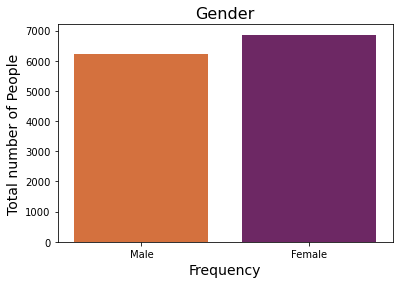

In [77]:
palette = sns.color_palette("inferno", len(merged_cleaned_demo_data['Gender'].value_counts()))

# Mapping the 'Gender' values to colors
Gender_counts = merged_cleaned_demo_data['Gender'].value_counts()
colors = {Gender: palette[i] for i, Gender in enumerate(Gender_counts.index)}

# Plotting the distribution of 'Gender' with the fixed palette
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=merged_cleaned_demo_data, palette=colors)
plt.title('Gender', fontsize=16)
plt.xlabel('Frequency', fontsize=14)  # Add x-axis label
plt.ylabel('Total number of People', fontsize=14)  # Add y-axis label
plt.show()


#### Observation:
As can be seen from the above bar plot between __Gender__ vs __Frequency__ with binary categories
- The data looks highly balanced, with majority being Females around 7000

In [78]:
# Set up the figure size
plt.figure(figsize=(8,6))

# Plotting the distribution of 'Age' with the specified color
sns.countplot(x='Age', data=merged_cleaned_demo_data, color='skyblue')

# Add title and axis labels
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Range of the ages', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

#### Observation:
As can be seen from the above bar plot between __Range of the ages__ vs __Frequency__
- The data looks balanced, with majority age group being __45-60__ and least being __18-29__

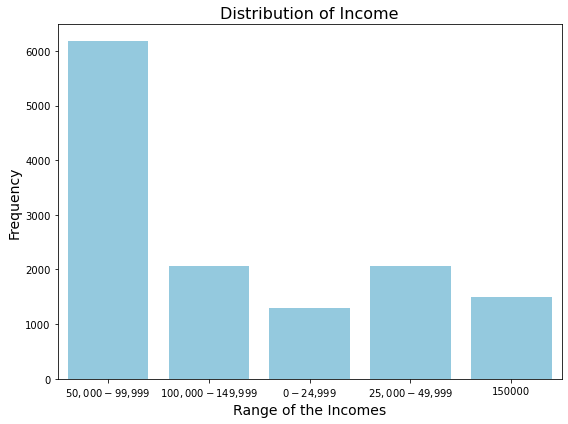

In [79]:
# Set a single color for all bars
color = 'skyblue'

# Plotting the distribution of 'Household_Income' with the fixed color
plt.figure(figsize=(8, 6))
sns.countplot(x='Household_Income', data=merged_cleaned_demo_data, color=color)
plt.title('Distribution of Income', fontsize=16)
plt.xlabel('Range of the Incomes', fontsize=14)  # Add x-axis label
plt.ylabel('Frequency', fontsize=14)  # Add y-axis label
#plt.xticks(rotation=45)  # Rotate x-axis labels to 45 degrees if needed
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


#### Observation:
As can be seen from the above bar plot between __Range of the Incomes__ vs __Frequency__
- In the data, with majority lie in Income range of __50,000 - 99,999__ and least in __0 - 24,999__

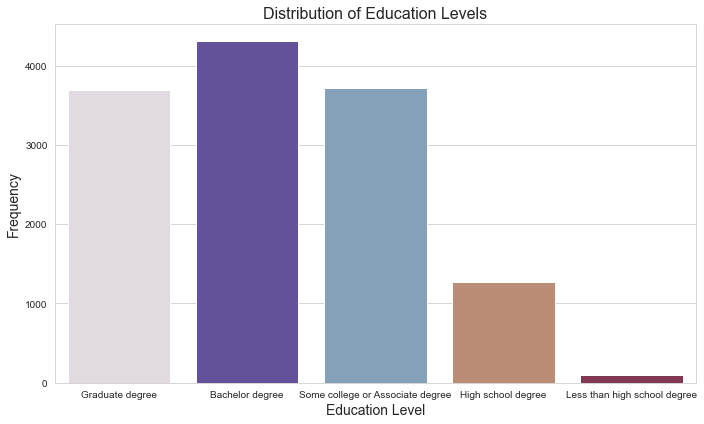

In [90]:
palette = sns.color_palette("twilight_shifted", len(merged_cleaned_demo_data['Education'].value_counts()))

# Mapping the 'Education' values to colors
education_counts = merged_cleaned_demo_data['Education'].value_counts()
colors = {education: palette[i] for i, education in enumerate(education_counts.index)}

# Plotting the distribution of 'Education' with the fixed palette
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Education', data=merged_cleaned_demo_data, palette=colors)
plt.title('Distribution of Education Levels', fontsize=16)
plt.xlabel('Education Level', fontsize=14)  # Add x-axis label
plt.ylabel('Frequency', fontsize=14)  # Add y-axis label

# Manually wrap long labels
def wrap_labels(labels, max_width):
    wrapped_labels = []
    for label in labels:
        wrapped_label = '\n'.join([label[i:i+max_width] for i in range(0, len(label), max_width)])
        wrapped_labels.append(wrapped_label)
    return wrapped_labels

max_label_width = 40  # Adjust according to the maximum width you want
wrapped_labels = wrap_labels(merged_cleaned_demo_data['Education'].unique(), max_label_width)
ax.set_xticklabels(wrapped_labels, ha='center')  # Align labels to the center
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


#### Observation:
As can be seen from the above bar plot between __Education Level__ vs __Frequency__
- In the data, the Education level that has highest Frequency is __Bachelor degree__ and least in __Less than high school degree__

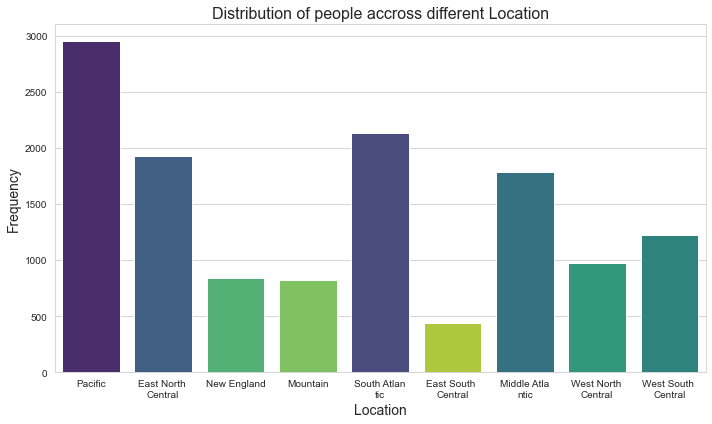

In [95]:
palette = sns.color_palette("viridis", len(merged_cleaned_demo_data['Location_Census_Region'].value_counts()))

# Mapping the 'Location_Census_Region' values to colors
location_counts = merged_cleaned_demo_data['Location_Census_Region'].value_counts()
colors = {location: palette[i] for i, location in enumerate(location_counts.index)}

# Plotting the distribution of 'Location_Census_Region' with the fixed palette
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Location_Census_Region', data=merged_cleaned_demo_data, palette=colors)
plt.title('Distribution of people accross different Location', fontsize=16)
plt.xlabel('Location', fontsize=14)  # Add x-axis label
plt.ylabel('Frequency', fontsize=14)  # Add y-axis label

# Manually wrap long labels
def wrap_labels(labels, max_width):
    wrapped_labels = []
    for label in labels:
        wrapped_label = '\n'.join([label[i:i+max_width] for i in range(0, len(label), max_width)])
        wrapped_labels.append(wrapped_label)
    return wrapped_labels

max_label_width = 11  # Adjust according to the maximum width you want
wrapped_labels = wrap_labels(merged_cleaned_demo_data['Location_Census_Region'].unique(), max_label_width)
ax.set_xticklabels(wrapped_labels, ha='center')  # Align labels to the center
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### Observation:
As can be seen from the above bar plot between __Location__ vs __Frequency__
- In the data, __Pacific__ has the highest count of flyers and least from __East South Central__

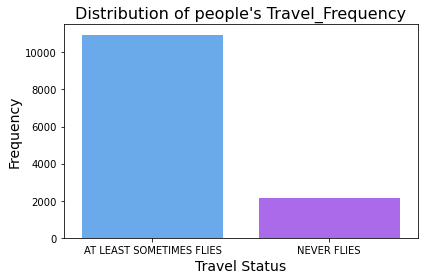

In [82]:
palette = sns.color_palette("cool", len(merged_cleaned_demo_data['Travel_Frequency'].value_counts()))

# Mapping the 'Travel_Frequency' values to colors
Travel_counts = merged_cleaned_demo_data['Travel_Frequency'].value_counts()
colors = {Travel: palette[i] for i, Travel in enumerate(Travel_counts.index)}

# Plotting the distribution of 'Travel_Frequency' with the fixed palette
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Travel_Frequency', data=merged_cleaned_demo_data, palette=colors)
plt.title("Distribution of people's Travel_Frequency", fontsize=16)
plt.xlabel('Travel Status', fontsize=14)  # Add x-axis label
plt.ylabel('Frequency', fontsize=14)  # Add y-axis label

# Manually wrap long labels
def wrap_labels(labels, max_width):
    wrapped_labels = []
    for label in labels:
        wrapped_label = '\n'.join([label[i:i+max_width] for i in range(0, len(label), max_width)])
        wrapped_labels.append(wrapped_label)
    return wrapped_labels

max_label_width = 30  # Adjust according to the maximum width you want
wrapped_labels = wrap_labels(merged_cleaned_demo_data['Travel_Frequency'].unique(), max_label_width)
ax.set_xticklabels(wrapped_labels, ha='center')  # Align labels to the center
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### Observation:
As can be seen from the above bar plot between __Travel Status__ vs __Frequency__
- The data looks highly imbalanced, with __AT LEAST SOMETIMES FLIES__ has the highest count amongst the binary

### Step 2:EDA Univariate Analysis : Numerical Variable

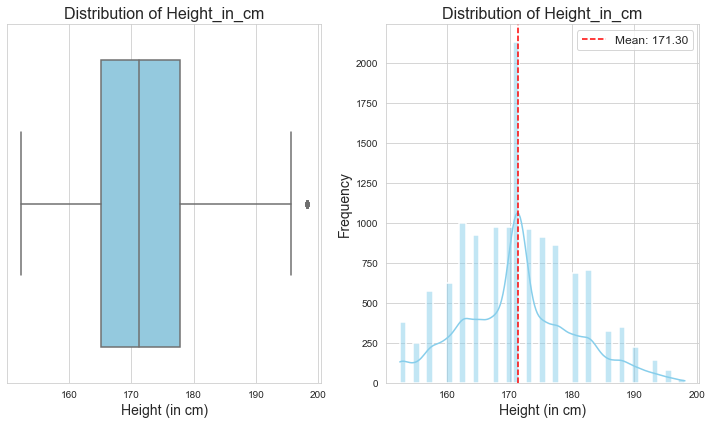

In [83]:
# Set style
sns.set_style("whitegrid")

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

var = 'Height_in_cm'

# Box plot
sns.boxplot(x=var, data=merged_cleaned_demo_data, ax=ax[0], color='skyblue', linewidth=1.5)
ax[0].set_title(f'Distribution of {var}', fontsize=16)
ax[0].set_xlabel('Height (in cm)', fontsize=14)
ax[0].set_ylabel('')

# Histogram
sns.histplot(merged_cleaned_demo_data[var], kde=True, ax=ax[1], color='skyblue', linewidth=1.5)
ax[1].set_title(f'Distribution of {var}', fontsize=16)
ax[1].set_xlabel('Height (in cm)', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

# Add mean line to histogram
mean_height = np.nanmean(merged_cleaned_demo_data[var])
ax[1].axvline(x=mean_height, color='red', linestyle='--', label=f'Mean: {mean_height:.2f}')
ax[1].legend(fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

#### Observation:
As can be seen from the above box plot and Histogram plot about __Height__
- Looks like a uniform distribution, fairly symmetric around mean
- The mean is at 171.30 cm
- The distribution has the median in the middle from the box plot with one outlier on the right

### Step 3:EDA Bi-variate Analysis :
### 1. Height_in_cm (numeric) vs.Age(categorical)

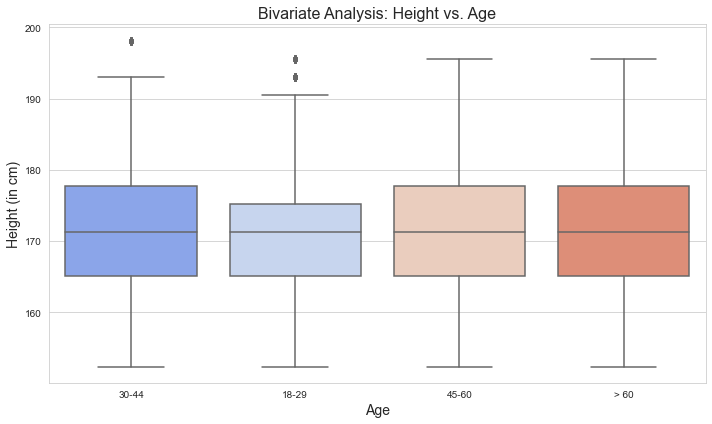

In [84]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the bivariate analysis
sns.boxplot(x='Age', y='Height_in_cm', data=merged_cleaned_demo_data, palette='coolwarm')
plt.title('Bivariate Analysis: Height vs. Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Height (in cm)', fontsize=14)
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### Observation:
As can be seen from the above box plots __Height__ vs __Age Groups__
- Looks like all the age groups have median around same value
- The age groups 30-44 and 18-29 seems to have outliers on the higher end
- The age groups 45-60 and >60 show similar range in heights, wider than rest

### 2. Height_in_cm (numeric) vs. gender(categorical)

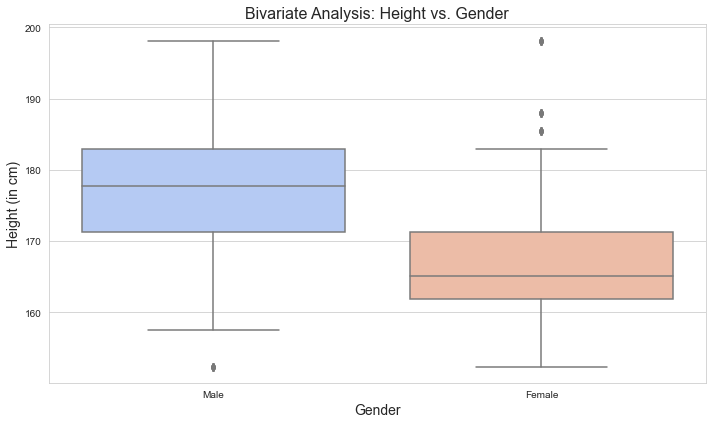

In [85]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the bivariate analysis
sns.boxplot(x='Gender', y='Height_in_cm', data=merged_cleaned_demo_data, palette='coolwarm')
plt.title('Bivariate Analysis: Height vs. Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Height (in cm)', fontsize=14)
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### Observation:
As can be seen from the above box plots __Height__ vs __Gender__
- Males have higher median height, their quartile bounds are higher than Females
- Males show one outlier in lower Height and Females show a bunch on the higher side

### 3. Education (categorical) vs. Household_Income (categorical)

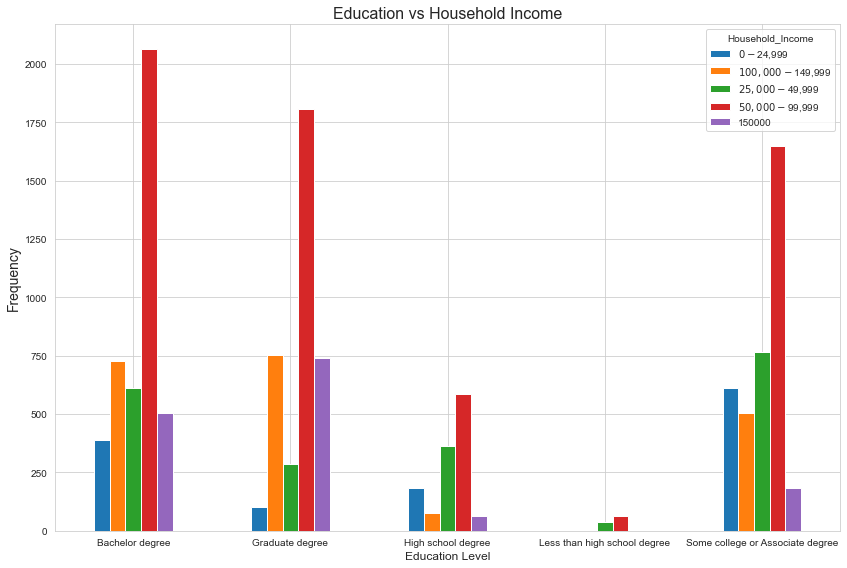

In [98]:
# Define the function to wrap labels
def wrap_labels(labels, max_width):
    wrapped_labels = []
    for label in labels:
        wrapped_label = '\n'.join([label[i:i+max_width] for i in range(0, len(label), max_width)])
        wrapped_labels.append(wrapped_label)
    return wrapped_labels


CrosstabResult=pd.crosstab(index=merged_cleaned_demo_data['Education'],columns=merged_cleaned_demo_data['Household_Income'])

CrosstabResult.plot.bar(figsize=(12,8), rot=0)

plt.title('Education vs Household Income', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Frequency', fontsize=14)

# Get the current x-axis labels
labels = [item.get_text() for item in ax.get_xticklabels()]

# Wrap the labels
max_width = 10  # Adjust as needed
wrapped_labels = wrap_labels(labels, max_width)

# Set the wrapped labels as new x-axis labels
ax.set_xticklabels(wrapped_labels)

plt.tight_layout()
plt.show()

#### Observation:
As can be seen from the above bar plots __Education Level__ vs __Household Income__
- Less than high school degree only has income ranges 25,000 - 99,999 and 25,000 - 49,999
- Bachelors being the highest in proportion also show counts from all income ranges, highest in 50,000 - 99,999 income range bucket
- Graduate degree holders have the highest income bucket of 100,000 - 149,999 and 150,000
- Some college or Associate degree shows higest in 25,000 - 49,999 income range bucket

### 4. Location (categorical) vs. Travel_Frequency (categorical)

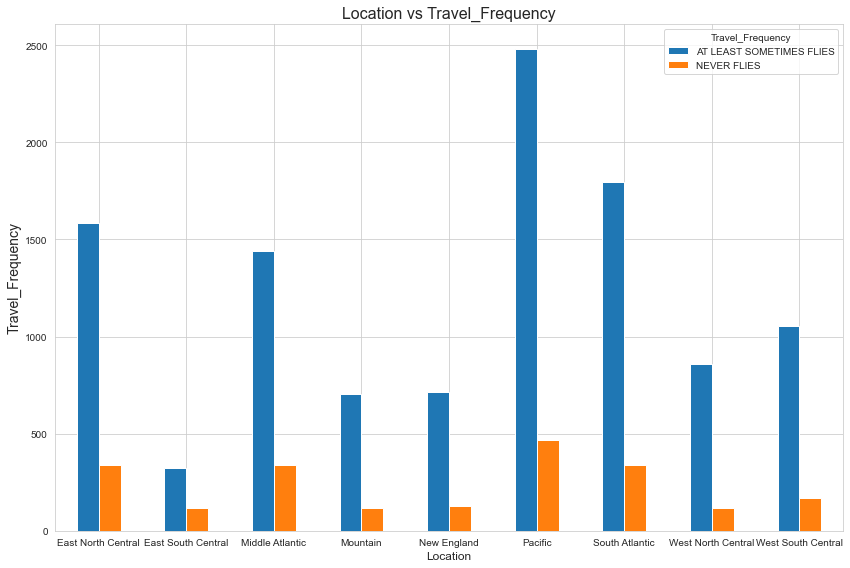

In [101]:
# Define the function to wrap labels
def wrap_labels(labels, max_width):
    wrapped_labels = []
    for label in labels:
        wrapped_label = '\n'.join([label[i:i+max_width] for i in range(0, len(label), max_width)])
        wrapped_labels.append(wrapped_label)
    return wrapped_labels


CrosstabResult=pd.crosstab(index=merged_cleaned_demo_data['Location_Census_Region'],columns=merged_cleaned_demo_data['Travel_Frequency'])

CrosstabResult.plot.bar(figsize=(12,8), rot=0)

plt.title('Location vs Travel_Frequency', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Travel_Frequency', fontsize=14)

# Get the current x-axis labels
labels = [item.get_text() for item in ax.get_xticklabels()]

# Wrap the labels
max_width = 2  # Adjust as needed
wrapped_labels = wrap_labels(labels, max_width)

# Set the wrapped labels as new x-axis labels
ax.set_xticklabels(wrapped_labels)

plt.tight_layout()
plt.show()

#### Observation:
As can be seen from the above bar plots __Travel_Frequency__ vs __Location__
- Pacific has the higest of all for both categories 
- East South Central has the lowest in both the categories among all
- In every Location, Travel Frequency of Never Flies is lower as was evident by the predominant imbalance

## **4. Demographic Analysis: Flyers vs. Non-Flyers**

### Demographic characteristics of individuals who NEVER fly vs. those of individuals who at least sometimes fly.
### Analysis 1: Travel_Frequency vs Household_Income

In [103]:

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Plot 1: Count plot of 'Household_Income' by 'Travel_Frequency'
sns.countplot(x='Household_Income', hue='Travel_Frequency', data=merged_cleaned_demo_data, ax=axes[0])
axes[0].set_title('Count Plot of Household Income by Travel Frequency')

# Plot 2: Count plot of 'Age' by 'Travel_Frequency'
sns.countplot(x='Age', hue='Travel_Frequency', data=merged_cleaned_demo_data, ax=axes[1])
axes[1].set_title('Count Plot of Age by Travel Frequency')

# Plot 3: Count plot of 'Travel_Frequency' by 'Household_Income'
sns.countplot(x='Travel_Frequency', hue='Household_Income', data=merged_cleaned_demo_data, ax=axes[2])
axes[2].set_title('Count Plot of Travel Frequency by Household Income')



plt.tight_layout()
plt.show()


#### Observation:
As can be seen from the above bar plots __Travel_Frequency__ vs __Household_Income__ and __Age__
- Highest in 50,000 - 99,999 income group against Travel Frequency
- Highest in 45-60 Age group against Travel Frequency
- Higest in At least sometimes flies in all income groups against Travel Frequency

In [1151]:
# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Plot 1: Count plot of 'Education' by 'Travel_Frequency'
sns.countplot(x='Education', hue='Travel_Frequency', data=merged_cleaned_demo_data, ax=axes[0])
axes[0].set_title('Count Plot of Education by Travel Frequency')

# Plot 2: Count plot of 'Location_Census_Region' by 'Travel_Frequency'
sns.countplot(x='Location_Census_Region', hue='Travel_Frequency', data=merged_cleaned_demo_data, ax=axes[1])
axes[1].set_title('Count Plot of Location by Travel Frequency')

# Plot 3: Count plot of 'Travel_Frequency' by 'Education'
sns.countplot(x='Travel_Frequency', hue='Education', data=merged_cleaned_demo_data, ax=axes[2])
axes[2].set_title('Count Plot of Travel Frequency by Education')

plt.tight_layout()
plt.show()

#### Observation:
As can be seen from the above bar plots __Travel_Frequency__ vs __Education__ and __Location__
- There is a trend in Graduates, Bachelors and Associate in at least sometimes flies as against never flies where lower categories dominate
- Most of them come from Pacific

## **5. Flyers: Demographic “Drill-down”**

### Task 1:  Which age grouping is most likely to responded “About half the time” to the question “Doyou ever recline your seat when you fly?”

In [1159]:
long_non_demo_data.columns

Index(['RespondentID', 'Travel_Frequency', 'Recline_Use',
       'Armrest_Access_Three_Seats', 'Armrest_Access_Two_Seats',
       'Window_Shade_Control', 'Getting_Up_Frequency', 'Survey_Question',
       'Flag'],
      dtype='object')

In [1160]:
cleaned_long_non_demo_data.columns

Index(['RespondentID', 'Travel_Frequency', 'Recline_Use',
       'Armrest_Access_Three_Seats', 'Armrest_Access_Two_Seats',
       'Window_Shade_Control', 'Getting_Up_Frequency', 'Survey_Question',
       'Flag'],
      dtype='object')

In [1161]:
merged_cleaned_demo_data.columns

Index(['RespondentID', 'Has_Children_Under18', 'Gender', 'Age',
       'Household_Income', 'Education', 'Location_Census_Region',
       'Height_in_cm', 'Travel_Frequency'],
      dtype='object')

In [1162]:
cleaned_demo_data.columns

Index(['RespondentID', 'Has_Children_Under18', 'Gender', 'Age',
       'Household_Income', 'Education', 'Location_Census_Region',
       'Height_in_cm'],
      dtype='object')

In [1163]:
demo_data.columns

Index(['RespondentID', 'Has_Children_Under18', 'Gender', 'Age',
       'Household_Income', 'Education', 'Location_Census_Region',
       'Height_in_cm'],
      dtype='object')

In [1167]:
long_non_demo_data.Recline_Use.unique()

array([nan, 'About half the time', 'Usually', 'Always', 'Once in a while',
       'Never'], dtype=object)

In [1168]:
# Filter the long_non_demo_data dataset for respondents who answered "About half the time"
about_half_time_responses = long_non_demo_data[long_non_demo_data['Recline_Use'] == 'About half the time']
about_half_time_responses

RespondentID      Travel_Frequency          Recline_Use  \
1        3434278696   Once a year or less  About half the time   
4        3434250245  Once a month or less  About half the time   
28       3434049700   Once a year or less  About half the time   
30       3434033301   Once a year or less  About half the time   
36       3434003204   Once a year or less  About half the time   
...             ...                   ...                  ...   
13468    3431769300   Once a year or less  About half the time   
13471    3431767233  Once a month or less  About half the time   
13478    3431760331  Once a month or less  About half the time   
13479    3431759736   Once a year or less  About half the time   
13502    3431743115  Once a month or less  About half the time   

                              Armrest_Access_Three_Seats  \
1                         The arm rests should be shared   
4      The person in the middle seat gets both arm rests   
28                        The arm rests should be shared   
30     The people in the aisle and window seats get b...   
36                        The arm rests should be shared   
...                                                  ...   
13468                     The arm rests should be shared   
13471  The person in the middle seat gets both arm rests   
13478                     The arm rests should be shared   
13479                     The arm rests should be shared   
13502                     The arm rests should be shared   

             Armrest_Access_Two_Seats  \
1      The arm rests should be shared   
4                 The person in aisle   
28     The arm rests should be shared   
30                The person in aisle   
36     The arm rests should be shared   
...                               ...   
13468        The person by the window   
13471             The person in aisle   
13478  The arm rests should be shared   
13479  The arm rests should be shared   
13502  The arm rests should be shared   

                                    Window_Shade_Control Getting_Up_Frequency  \
1               Everyone in the row should have some say                Twice   
4               Everyone in the row should have some say                Twice   
28              Everyone in the row should have some say           Four times   
30     The person in the window seat should have excl...                 Once   
36              Everyone in the row should have some say                Twice   
...                                                  ...                  ...   
13468           Everyone in the row should have some say          Three times   
13471           Everyone in the row should have some say          Three times   
13478  The person in the window seat should have excl...                Twice   
13479           Everyone in the row should have some say          Three times   
13502  The person in the window seat should have excl...           Four times   

                   Survey_Question  Flag  
1             Unsold_Seat_Use_Rude   0.0  
4             Unsold_Seat_Use_Rude   0.0  
28            Unsold_Seat_Use_Rude   0.0  
30            Unsold_Seat_Use_Rude   1.0  
36            Unsold_Seat_Use_Rude   0.0  
...                            ...   ...  
13468  Bathroom_Smoking_Violation    0.0  
13471  Bathroom_Smoking_Violation    0.0  
13478  Bathroom_Smoking_Violation    0.0  
13479  Bathroom_Smoking_Violation    0.0  
13502  Bathroom_Smoking_Violation    0.0  

[1534 rows x 9 columns]

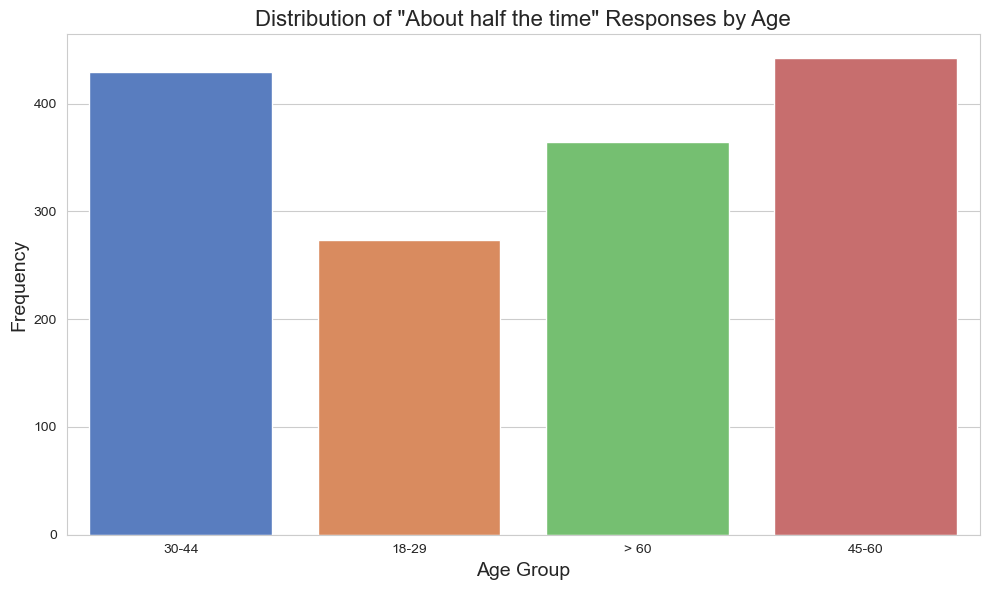

In [1170]:
# Filter the long_non_demo_data dataset for respondents who answered "About half the time"
about_half_time_responses = long_non_demo_data[long_non_demo_data['Recline_Use'] == 'About half the time']

# Merge the filtered dataset with the cleaned_demo_data on 'RespondentID'
merged_data2 = about_half_time_responses.merge(cleaned_demo_data[['RespondentID', 'Age']], on='RespondentID', how='inner')

# Plot a count plot to visualize the distribution of "About half the time" responses across different age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=merged_data2, palette='muted')
plt.title('Distribution of "About half the time" Responses by Age', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
#plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

#### Observation:
As can be seen from the above bar plot for about half the time recline use __Age Groups__ Frequency
- The age group 45-60 shows highest frequency __which makes sense__
- The age group 18-29 shows least frequency

### Task 2:  Are male or female flyers most likely to have responded “Yes” to the question “Do you have any children under 18?” 

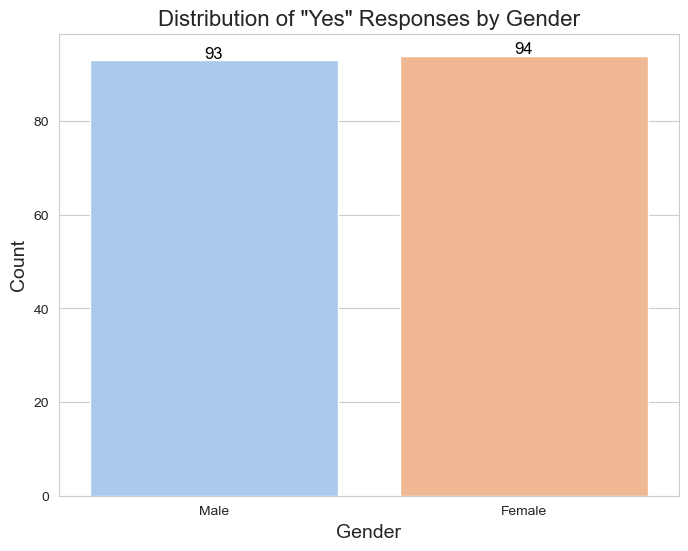

In [1173]:
# Filter the data to include only respondents who answered "Yes" to having children under 18
yes_children_data = demo_data[demo_data['Has_Children_Under18'] == 'Yes']

# Create a count plot to visualize the distribution of "Has_Children_Under18" by "Gender"
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=yes_children_data, palette='pastel')

# Annotate each bar with the count value
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.title('Distribution of "Yes" Responses by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

#### Observation:
As can be seen from the above bar plot for about have any children under 18 by __Gender__ Frequency
- Nearly equal numbers of males and females have responded Yes __which makes sense__

### Task 3:  Which income group is least likely to have responded “The person in the window seat should have exclusive control” to the question “Who should have control over the window shade?”.

In [1175]:
# Merge the two datasets on 'RespondentID'
merged_data3 = cleaned_demo_data.merge(long_non_demo_data[['RespondentID', 'Window_Shade_Control']], on='RespondentID', how='inner')

# Filter the data to include only respondents who answered "The person in the window seat should have exclusive control"
exclusive_control_data = merged_data3[merged_data3['Window_Shade_Control'] == 'The person in the window seat should have exclusive control']

# Create a count plot to visualize the distribution of responses by household income
plt.figure(figsize=(10, 6))
sns.countplot(x='Household_Income', data=exclusive_control_data, palette='pastel')

plt.title('Distribution of "The person in the window seat should have exclusive control" Responses by Household Income', fontsize=16)
plt.xlabel('Household Income', fontsize=14)
plt.ylabel('Count', fontsize=14)
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### Observation:
As can be seen from the above bar plot for about Window_Shade_Control by __Household Income__ Frequency
- The income group 50,000 - 99,999 have majority response as Yes to exclusive control to window seat quesiton

### Task 4:  How have the various ‘Location” groupings responded to the question “Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?” 

In [1176]:
non_demo_data.columns

Index(['RespondentID', 'Travel_Frequency', 'Recline_Use',
       'Armrest_Access_Three_Seats', 'Armrest_Access_Two_Seats',
       'Window_Shade_Control', 'Unsold_Seat_Use_Rude',
       'Babbling_with_stranger_Rude', 'Getting_Up_Frequency',
       'Seat_Recline_Obligation', 'Seat_Recline_Rudeness',
       'Reclining_Seat_Elimination_Preference ',
       'Switching_Seat_for_friends_Rude', 'Switching_Seat_for_family_Rude',
       'Waking_for_Bathroom_Rude', 'Waking_for_a_walk_Rude ',
       'Bringing_Baby_on_Plane_Rude', 'Bringing_Unruly_Children_on_Plane_Rude',
       'Useage_Violation_of_Electronics', 'Bathroom_Smoking_Violation '],
      dtype='object')

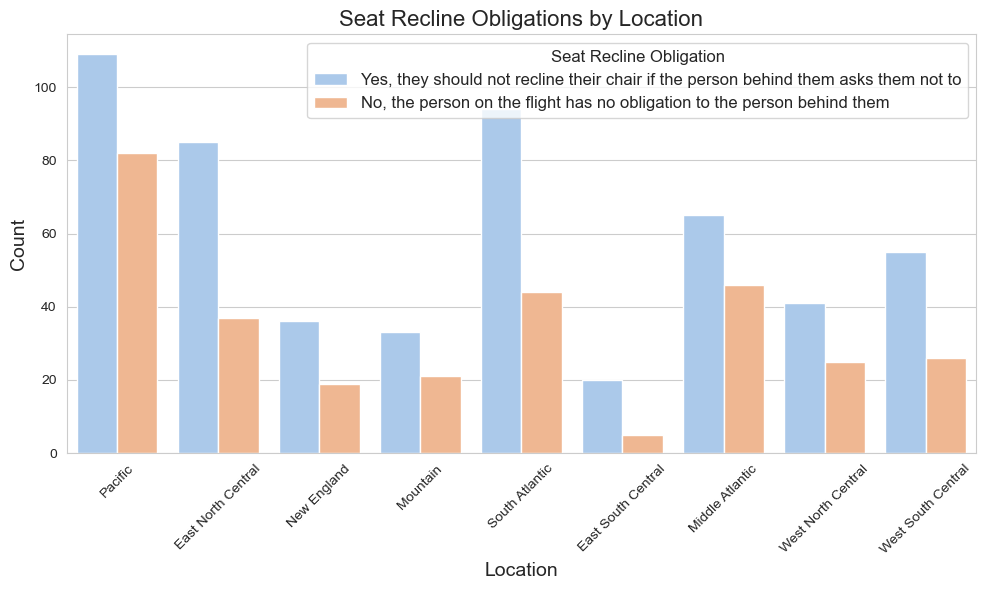

In [1178]:
# Merge the two datasets on 'RespondentID'
merged_data = cleaned_demo_data.merge(non_demo_data[['RespondentID', 'Seat_Recline_Obligation']], on='RespondentID', how='inner')

# Create a count plot to visualize the distribution of responses by location
plt.figure(figsize=(10, 6))
sns.countplot(x='Location_Census_Region', hue='Seat_Recline_Obligation', data=merged_data, palette='pastel')

plt.title('Seat Recline Obligations by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Seat Recline Obligation', fontsize=12, title_fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### Observation:
As can be seen from the above bar plot for about Recline Obligation by __Location__ Frequency
- Majority People from all locations said yes to Recline Obligation 

### Task 5: Which gender is most likely to have responded “No, not at all rude” to the question “Is it rude to wake a passenger up if you are trying to go to the bathroom?”


In [1184]:
# Merge the two datasets on 'RespondentID'
merged_data = cleaned_demo_data.merge(non_demo_data[['RespondentID', 'Waking_for_Bathroom_Rude']], on='RespondentID', how='inner')

# Filter the data to include only responses where waking a passenger up for the bathroom is considered "No, not at all rude"
no_rude_responses = merged_data[merged_data['Waking_for_Bathroom_Rude'] == "No, not at all rude"]



# Create a count plot to visualize the distribution of responses by gender
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', data=no_rude_responses, palette='pastel')

plt.title('Responses to Waking Passenger for Bathroom by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


#### Observation:
As can be seen from the above bar plot for about Is it rude to wake up for walk by __Gender__ Frequency
- Men and Women equally think that it is rude to wake up anyone for a walk. Men exceed though.

### Task 6: What is the average height (in centimeters) of the male survey respondents? What is the average height (in centimeters) of the female survey respondents? 

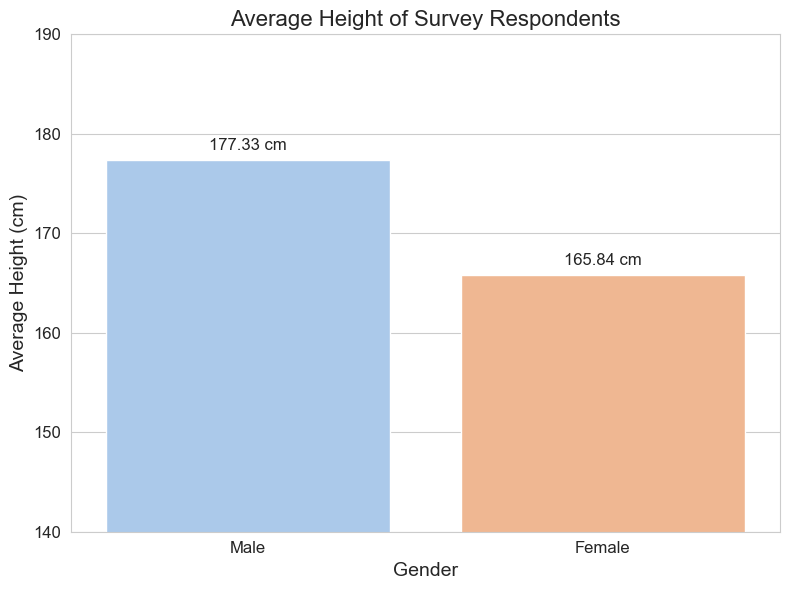

In [1185]:
# Filter the dataset for male and female respondents
male_data = cleaned_demo_data[cleaned_demo_data['Gender'] == 'Male']
female_data = cleaned_demo_data[cleaned_demo_data['Gender'] == 'Female']

# Calculate the average height for male and female respondents
avg_height_male = male_data['Height_in_cm'].mean()
avg_height_female = female_data['Height_in_cm'].mean()

# Create a bar plot to visualize the average heights
plt.figure(figsize=(8, 6))
sns.barplot(x=['Male', 'Female'], y=[avg_height_male, avg_height_female], palette='pastel')

plt.title('Average Height of Survey Respondents', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Height (cm)', fontsize=14)
plt.ylim(140, 190)  # Adjust the y-axis limits for better visualization
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations to show the exact average heights on top of the bars
for index, value in enumerate([avg_height_male, avg_height_female]):
    plt.text(index, value + 1, f'{value:.2f} cm', ha='center', fontsize=12)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### Observations:
- In this we can see that the average height for male and female is __177.33__ and __165.84__ respectively.
- In height males dominate.

### Task 7: Provide a general demographic profile of individuals who have responded “No, not at all rude” to the question “In general, is it rude to knowingly bring unruly children on a plane?”

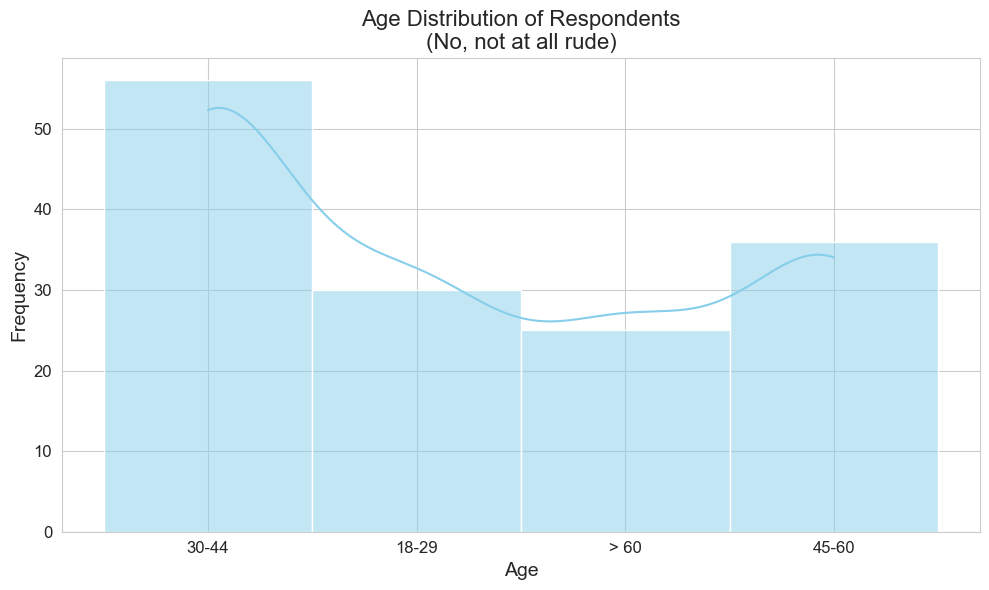

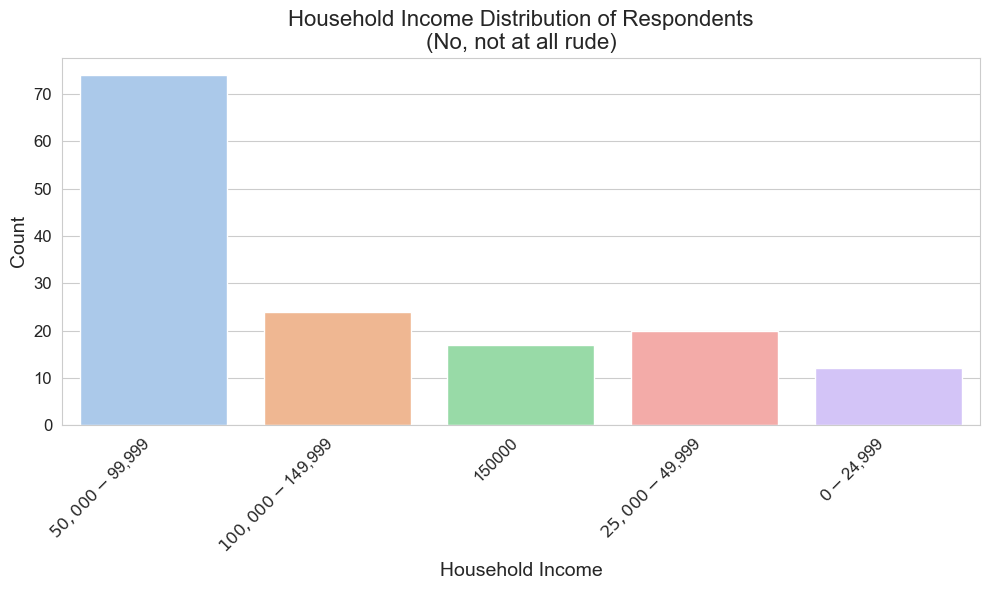

In [1191]:
# Merge the two datasets on 'RespondentID'
merged_data4 = cleaned_demo_data.merge(non_demo_data[['RespondentID', 'Bringing_Unruly_Children_on_Plane_Rude']], on='RespondentID', how='inner')


# Filter the dataset for respondents who responded "No, not at all rude"
rude_children_no_responses = merged_data4[merged_data4['Bringing_Unruly_Children_on_Plane_Rude'] == 'No, not at all rude']

# Demographic profile analysis
# 1. Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=rude_children_no_responses, palette='pastel')
plt.title('Gender Distribution of Respondents\n(No, not at all rude)', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# 2. Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=rude_children_no_responses, bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Respondents\n(No, not at all rude)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# 3. Household income distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Household_Income', data=rude_children_no_responses, palette='pastel')
plt.title('Household Income Distribution of Respondents\n(No, not at all rude)', fontsize=16)
plt.xlabel('Household Income', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()

# 4. Education level distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=rude_children_no_responses, palette='pastel')
plt.title('Education Level Distribution of Respondents\n(No, not at all rude)', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()

# 5. Location census region distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Location_Census_Region', data=rude_children_no_responses, palette='pastel')
plt.title('Location Census Region Distribution of Respondents\n(No, not at all rude)', fontsize=16)
plt.xlabel('Location Census Region', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()

# 6. Height distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Height_in_cm', data=rude_children_no_responses, palette='pastel')
plt.title('Height wise Distribution of Respondents\n(No, not at all rude)', fontsize=16)
plt.xlabel('Height range', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

#### Observations:
- looks, like female are more sentimental and more connected to kids, so that the reason may be most of the female think its not rude at all.
- it is clearly visible that the middle age group people i.e. from 30-44 are more tolerant towards the children.
- Oldage and teenage are the groups which are least tolerant towards the children.
- Age group of the people who have children are seen to be toleratent we can simply state that.
- The house hold with the income 50,000-99,999 are seen to be more tolerant towards the children.
- Graduated people are tolerant towards children, so basically most of the educated peoople are tolerant towards towards children.
- Most of the people from Pacific seem to be more tolerant towards children compared to other regions.
- As, we can see most of the people with height __160.02__ are tolerant which is near to the average height of females, so it agains brings us the insights to the females.

## **6. Findings/Summary**:

- In the data, Pacific has the highest count of flyers and least from East South Central
- Males have higher median height, their quartile bounds are higher than Females
- Males show one outlier in lower Height and Females show a bunch on the higher side
- Less than high school degree only has income ranges 25,000 - 99,999 and 25,000 - 49,999
- Bachelors being the highest in proportion also show counts from all income ranges, highest in 50,000 - 99,999 income range bucket
- Graduate degree holders have the highest income bucket of 100,000 - 149,999 and 150,000
- Some college or Associate degree shows higest in 25,000 - 49,999 income range bucket
- There is a trend in Graduates, Bachelors and Associate in at least sometimes flies as against never flies where lower categories dominate
- The age group 45-60 shows highest frequency in recline use which makes sense
- Nearly equal numbers of males and females have responded Yes to having children younger than 18 which makes sense
- The income group 50,000 - 99,999 have majority response as Yes to exclusive control to window seat quesiton
- Majority People from all locations said yes to Recline Obligation as in Yes they should not recline without asking behind
- Men and Women equally think that it is rude to wake up anyone for a walk. Men exceed though.